# Problem Statement

### Project Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

##### Key attributes of the database

The database includes the following indicators:
- country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
- country_long (text): longer form of the country designation
- name (text): name or title of the power plant, generally in Romanized form
- gppd_idnr (text): 10 or 12 character identifier for the power plant
- capacity_mw (number): electrical generating capacity in megawatts
- latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- primary_fuel (text): energy source used in primary electricity generation or export
- other_fuel1 (text): energy source used in electricity generation or export
- other_fuel2 (text): energy source used in electricity generation or export
- other_fuel3 (text): energy source used in electricity generation or export
- commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available
- owner (text): majority shareholder of the power plant, generally in Romanized form
- source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- url (text): web document corresponding to the `source` field
- geolocation_source (text): attribution for geolocation information
- wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- year_of_capacity_data (number): year the capacity information was reported
- generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013
- generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014
- generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015
- generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016
- generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017
- generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018
- generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019
- generation_data_source (text): attribution for the reported generation information
- estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013
- estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014 
- estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015 
- estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016 
- estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017 
- estimated_generation_note_2013 (text): label of the model/method used to estimate generation for the year 2013
- estimated_generation_note_2014 (text): label of the model/method used to estimate generation for the year 2014 
- estimated_generation_note_2015 (text): label of the model/method used to estimate generation for the year 2015
- estimated_generation_note_2016 (text): label of the model/method used to estimate generation for the year 2016
- estimated_generation_note_2017 (text): label of the model/method used to estimate generation for the year 2017


Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories. 

##### Prediction

Make two prediction  1) Primary Fuel    2) capacity_mw

##### IMPORTING REQUIRED LIBARIES FOR EDA, DATA CLEANING AND WRANGLING

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import accuracy_score
import codecs
from sklearn.neighbors import KNeighborsRegressor

IMPORTING CSV FILE TO JUPYTER NOTEBOOK

In [2]:
gp_df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
gp_df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
gp_df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
gp_df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
gp_df.shape

(907, 27)

In [6]:
gp_df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [7]:
gp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

- Dataset contain 908 rows with 27 columns.
- Some of feature are with object datatypes and other with float.
- other_fuel3,generation_gwh_2013,wepp_id,generation_gwh_2019,estimated_generation_gwh.

### Statistical Analysis

#### Data Integrity Check

In [8]:
gp_df.isin([' ','NA','-','?']).sum().any()

False

- No Whitespace, NA and '-' exist in dataset.

In [9]:
gp_df.duplicated().sum()

0

If we Check CSV file and look at dataset head, there are lot of data cleaning operation need to done before performing any EDA and ML modelling.At first sight we can come across following observation in CSV file:
- Lot of missing data in certain columns.
- Lot of Non relevant data like gppd_idnr,url.
- and many more.

At end data need to clean and we will try to do some feature engineering afterwards to modify some columns.

### Finding Missing Values

In [10]:
gp_df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [11]:
gp_df.isnull().sum().sum()

10445

Columns we are going remove are :

- estimated_generation_gwh - Empty
- wepp_id - Empty
- generation_gwh_2013 - Empty
- generation_gwh_2019 - Empty
- other_fuel3 - Empty
- other_fuel1 - - 78% data missing
- other_fuel2 - 99% data missing
- owner - More than 60 % data missing
- country - Information not relevant
- country_long - Information not relevant
- gppd_idnr -Information not relevant
- url - No missing value but of no use
- year_of_capacity_data - Missing data with single unique value

In [12]:
gp_df.drop(columns=['country','country_long','url','year_of_capacity_data',
                 'gppd_idnr','owner','other_fuel3','other_fuel2',
                 'estimated_generation_gwh','wepp_id','generation_gwh_2013','generation_gwh_2019'],axis=1,inplace=True)

In [13]:
missing_values = gp_df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(gp_df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                        Missing Values  % Missing data
other_fuel1                        709       78.169791
generation_gwh_2014                509       56.119074
generation_gwh_2015                485       53.472988
generation_gwh_2016                473       52.149945
generation_gwh_2017                467       51.488423
generation_gwh_2018                459       50.606395
generation_data_source             458       50.496141
commissioning_year                 380       41.896362
latitude                            46        5.071665
longitude                           46        5.071665
geolocation_source                  19        2.094818
name                                 0        0.000000
capacity_mw                          0        0.000000
primary_fuel                         0        0.000000
source                               0        0.000000


### Proposed Strategy to Handle Missing data :

- As Geolocation source is categorical data we can impute it with mode of category.
- longitude and latitude can be impute with mean or median of longitude and latitude. This imputation will not distrub statstical balance of data as mean will be same at the end.
- As commissioning year for most of industrial powerplant is missing(40%) after checking correlation we will decide to keep or drop this features.
- In generation_data_source 50% data is missing and it doesnot have any importance in our analysis. So it is better to drop this feature.
- There are 5 Different columns of GenerationGW-Hours for year 2013 to 2017. Its dive into it further
  - It is important feature in for coal and hydro powerplant.
  - It is natural to have missing data in this category. As Oil,Gas based Powerplant operated in intermitant periodic way and some renewable powerplant like wind,tide are operated seasonaly.
  - Some new powerplant commission between 2013 and 2018. For these powerplant some data will definitely available.
  - We cannot do any mean or median imputation here as different powerplant have different generation capacity & Generation per year depend on runtime of powerplant.
  - We all know old powerplant normally kept off unless more demand of generation required. Reason to kept is low efficiency & high operating cost.
  - We can neglect real value data for such important feature. We will keep this feature along with missing value and perform further investigation.

- Other_fuel1 is another feature of some importance with missing value. Lets dive into it :
  - Not every powerplant build to work with alternate fuel.
  - Idea of other fuel is totally irrelevant to renewable energy source based powerplant like solar,wind,hydro.
  - First talk about powerplant for which concept of other fuel is applicable. We can impute them based domain knowledge.
    - Alternate Fuel of Coal based powerplant mostly is Oil or cogeneration.
    - Alternate Fuel of Industrial Oil based powerplant is Gas.
    - Alternate Fuel of Industrial Gas based powerplant is Oil.
    - We cannot define any alternative fuel for nuclear powerplant as it sole based on plant design & so many option.
  - For Renewable energy source based powerplant no alternate fuel needed. As it is categorical feature we can impute these powerplant with "Not Applicable". At end we are going Encoding these labels, 'Not Applicable' will be just one other additional label in encoding. Making no alternation on final result.

### Missing Value Imputation

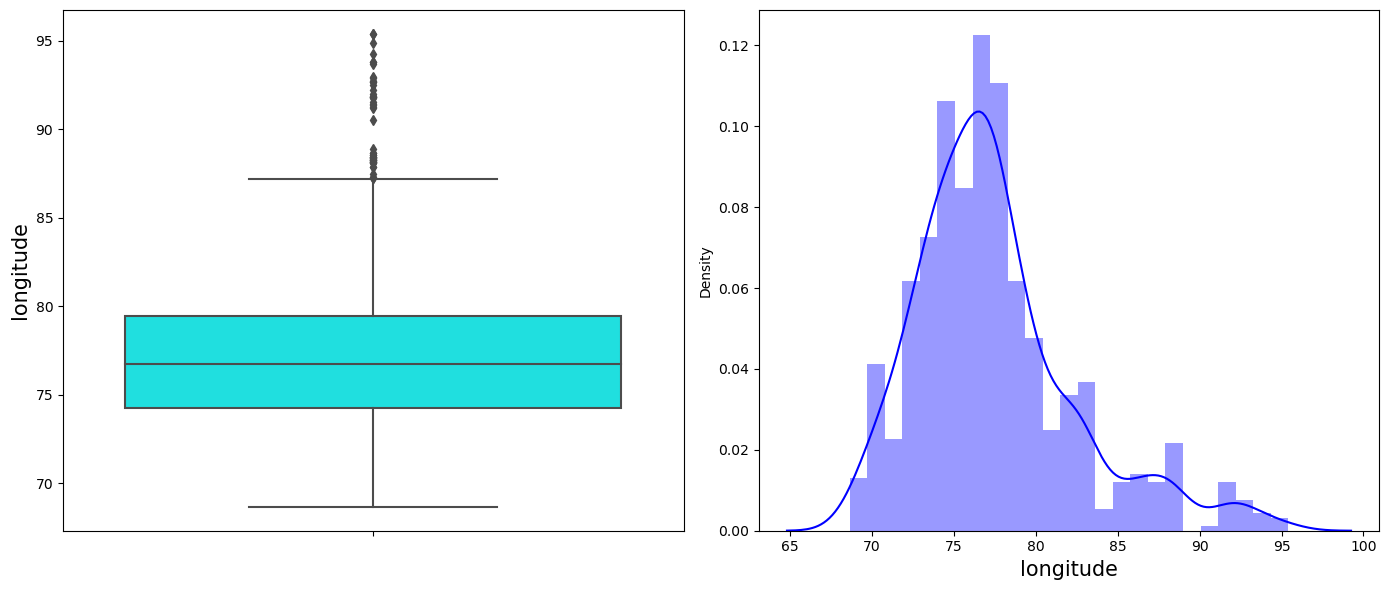

In [14]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='longitude', data=gp_df,color='cyan')
plt.ylabel('longitude',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(gp_df['longitude'], color='b')
plt.xlabel('longitude',fontsize=15)
plt.tight_layout()
plt.show()

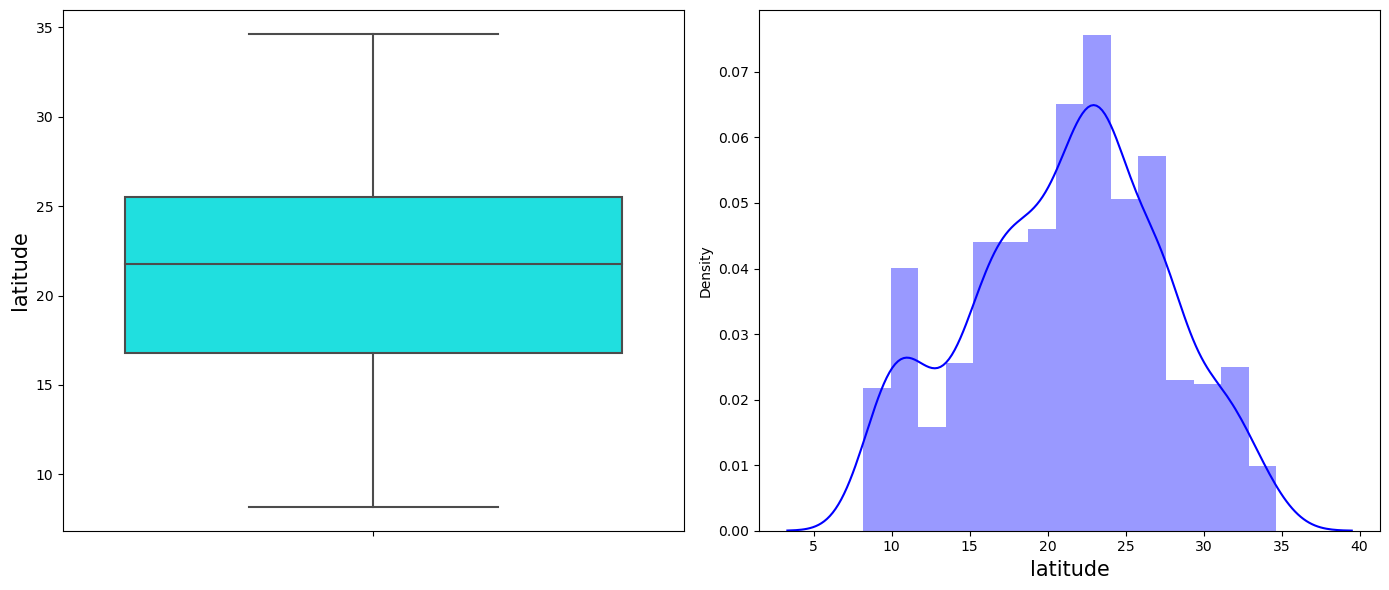

In [15]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='latitude', data=gp_df,color='cyan')
plt.ylabel('latitude',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(gp_df['latitude'], color='b')
plt.xlabel('latitude',fontsize=15)
plt.tight_layout()
plt.show()

In [16]:
# Missing Value Imputation of geolocation with mode
gp_df['geolocation_source'] = gp_df['geolocation_source'].fillna(gp_df['geolocation_source'].mode()[0])
# Missing Value Imputation of longitude with median
gp_df['longitude'] = gp_df['longitude'].fillna(gp_df['longitude'].median())
# Missing Value Imputation of latitude with mean
gp_df['latitude'] = gp_df['latitude'].fillna(gp_df['latitude'].mean())

In [17]:
missing_values = gp_df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(gp_df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                        Missing Values  % Missing data
other_fuel1                        709       78.169791
generation_gwh_2014                509       56.119074
generation_gwh_2015                485       53.472988
generation_gwh_2016                473       52.149945
generation_gwh_2017                467       51.488423
generation_gwh_2018                459       50.606395
generation_data_source             458       50.496141
commissioning_year                 380       41.896362
name                                 0        0.000000
capacity_mw                          0        0.000000
latitude                             0        0.000000
longitude                            0        0.000000
primary_fuel                         0        0.000000
source                               0        0.000000
geolocation_source                   0        0.000000


### Statstical Matrix

In [18]:
gp_df.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,907.0,326.223755,590.085456,0.0000,16.725000,59.200000,385.250000,4760.000
latitude,907.0,21.197918,6.079148,8.1689,17.072000,21.281800,25.176450,34.649
longitude,907.0,77.427103,4.815073,68.6447,74.388900,76.719500,79.206100,95.408
commissioning_year,527.0,1997.091082,17.082868,1927.0000,1988.000000,2001.000000,2012.000000,2018.000
generation_gwh_2014,398.0,2431.823590,4026.440035,0.0000,223.557672,801.123775,3035.306250,28127.000
generation_gwh_2015,422.0,2428.226946,4194.596959,0.0000,176.381063,711.181225,3084.121250,30539.000
generation_gwh_2016,434.0,2467.936859,4162.884308,0.0000,188.285252,737.205450,3282.861313,30015.000
generation_gwh_2017,440.0,2547.759305,4196.991169,0.0000,177.874930,817.977250,3275.690475,35116.000
generation_gwh_2018,448.0,2600.804099,4314.880456,0.0000,193.378250,751.644375,3143.535900,35136.000


## Regression Target feature - Capacity

In [19]:
print('Minimum Capacity of Powerplant:',gp_df.capacity_mw.min())
print('Maximum Capacity of Powerplant:',gp_df.capacity_mw.max())

Minimum Capacity of Powerplant: 0.0
Maximum Capacity of Powerplant: 4760.0


In [20]:
gp_df.loc[gp_df.capacity_mw==4760]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
880,VINDH_CHAL STPS,4760.0,24.0983,82.6719,Coal,Oil,2002.0,Central Electricity Authority,WRI,27594.0,29047.0,30015.0,35116.0,35136.0,Central Electricity Authority


In [21]:
gp_df.loc[gp_df.capacity_mw==0]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
829,Tata BP - Electronics City Solar Panel Plant,0.0,12.8491,77.6752,Solar,NaN,NaN,Tata BP Solar India Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN


- Biggest powerplant in India as per database is VINDH_CHAL STPS with Power generation capacity of 4760 MW. As Name suggest it is Thermal powerplant with Coal as Primary Fuel and alternate fuel is oil. It is commission in year 2002.
- Smallest power plant is mention as Tata BP - Electronics City Solar Panel Plant with capacity of 0 MW. This must be data entry error as If powerplant is commission it cannot have capacity of 0 MW.

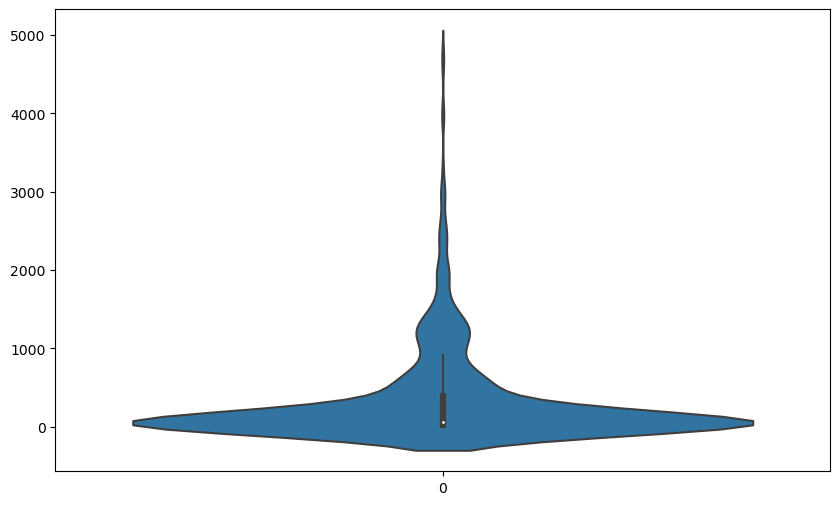

In [22]:
plt.figure(figsize=(10,6))
sns.violinplot(gp_df.capacity_mw)
plt.show()

In [23]:
gp_df.loc[gp_df.capacity_mw >1500].shape

(39, 15)

There are only 15 PowerPlant of capacity more than 1500MW.

In [24]:
pd.crosstab(gp_df['capacity_mw'],gp_df["primary_fuel"], margins=True).T.style.background_gradient(cmap='summer_r')

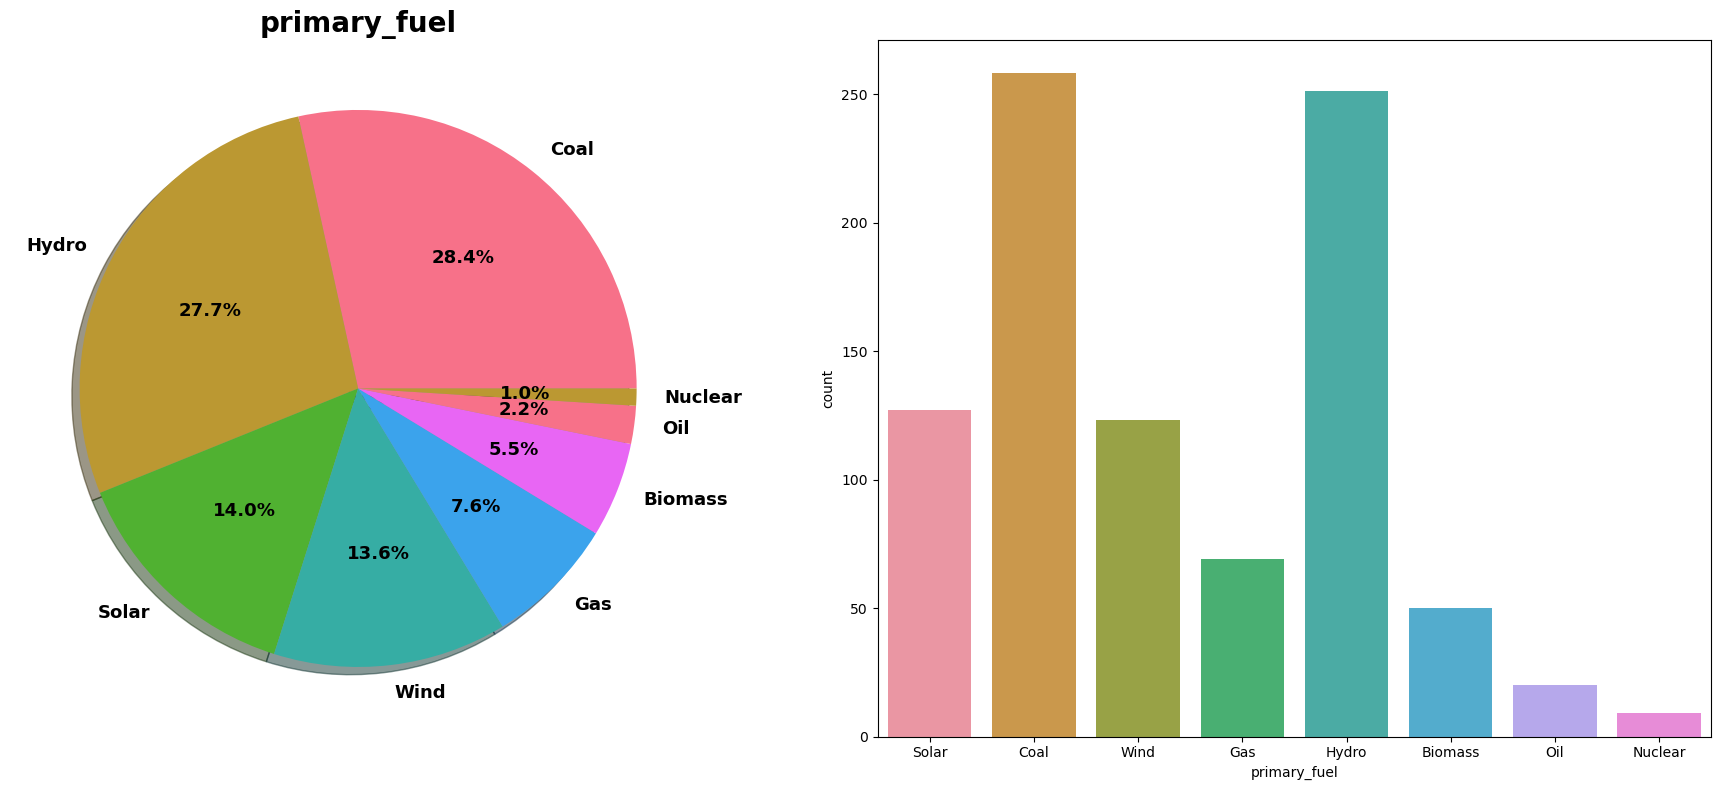

In [25]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
gp_df['primary_fuel'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('primary_fuel', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
ax[1] = sns.countplot(x = 'primary_fuel', data = gp_df)
plt.show()

In [26]:
gp_df['primary_fuel'].value_counts()

primary_fuel
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: count, dtype: int64

- Maximum Number of powerplant are coal based powerplant followed by Hydro energy based powerplants.
- Around 40 % Power plant are Unconventional powerplant mainly based on Non Renewable energy resorces.
- There are only 9 Nuclear powerplant. Usually these powerplant build for high capacity. It will be interesting to look for capacity of these powerplant.

In [27]:
print('Total Power Generation Capacity of all Power Plants:',gp_df['capacity_mw'].sum(),'MW')

Total Power Generation Capacity of all Power Plants: 295884.946 MW


#### India's Total Power Generation Capacity of is 295884.946 MW.

In [28]:
gp_df["capacity_mw"].groupby(gp_df["primary_fuel"]).agg([sum])

,sum
primary_fuel,
Biomass,1003.260
Coal,205839.220
Gas,25172.506
Hydro,46441.770
Nuclear,8780.000
Oil,1778.840
Solar,2757.500
Wind,4111.850


 Out of Total PowerGeneration Maximum comes from Coal.

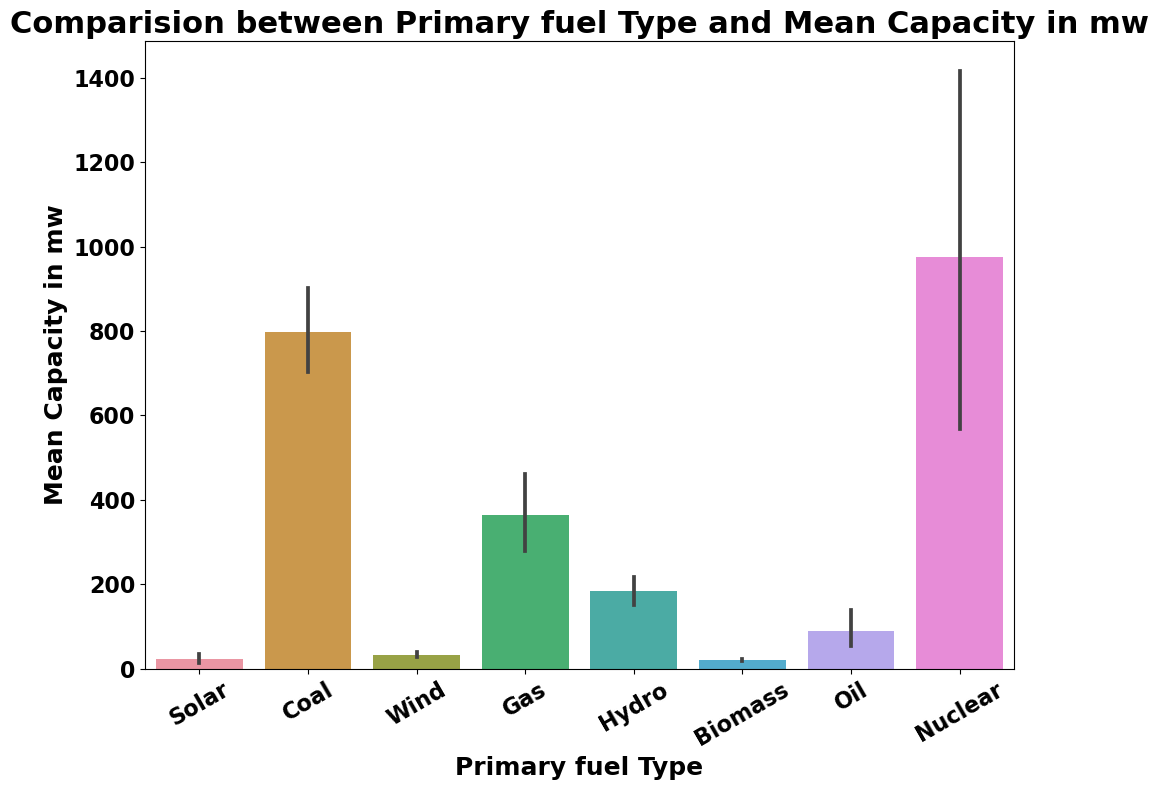

In [29]:
plt.figure(figsize = (10,8))
y = gp_df["capacity_mw"]
p = sns.barplot(x = "primary_fuel", y = "capacity_mw", data = gp_df)
plt.title('Comparision between Primary fuel Type and Mean Capacity in mw', fontsize=22, fontweight='bold')
p.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
p.set_ylabel('Mean Capacity in mw',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()

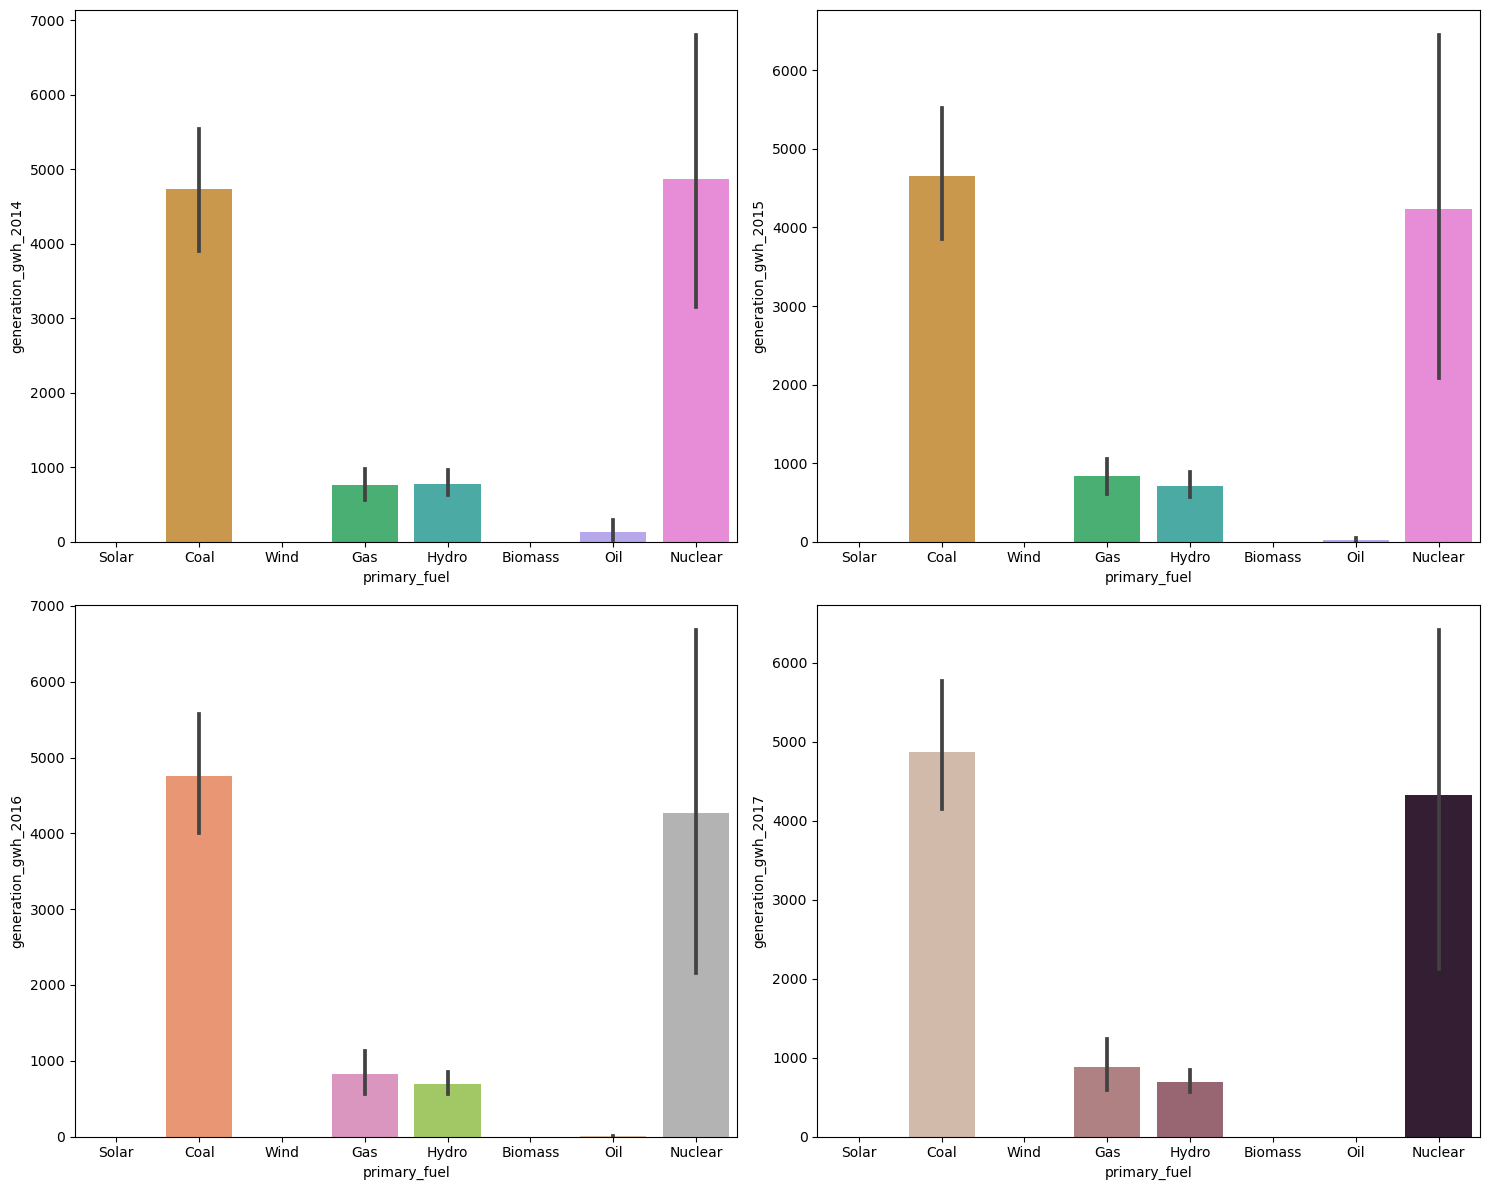

In [30]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

sns.barplot(x='primary_fuel',y='generation_gwh_2014',ax=axes[0,0],data=gp_df)

sns.barplot(x='primary_fuel',y='generation_gwh_2015',ax=axes[0,1],data=gp_df)

sns.barplot(x='primary_fuel',y='generation_gwh_2016',ax=axes[1,0],data=gp_df,palette="Set2")

sns.barplot(x='primary_fuel',y='generation_gwh_2017',ax=axes[1,1],data=gp_df,palette="ch:.25")

plt.show()

### Location vs Primary Fuel

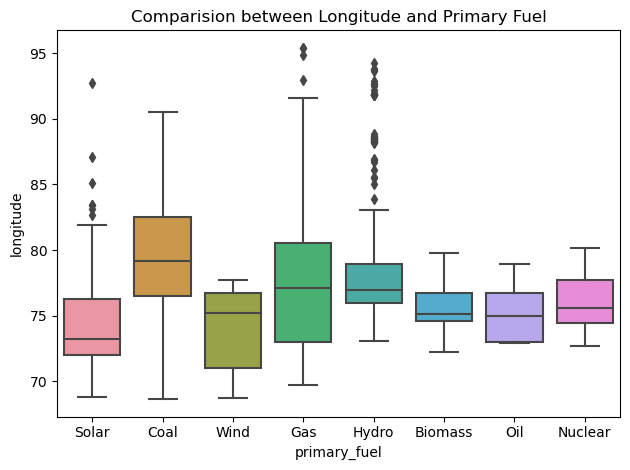

In [31]:
plt.title('Comparision between Longitude and Primary Fuel')
sns.boxplot(x='primary_fuel', y = 'longitude', data = gp_df)
plt.show()

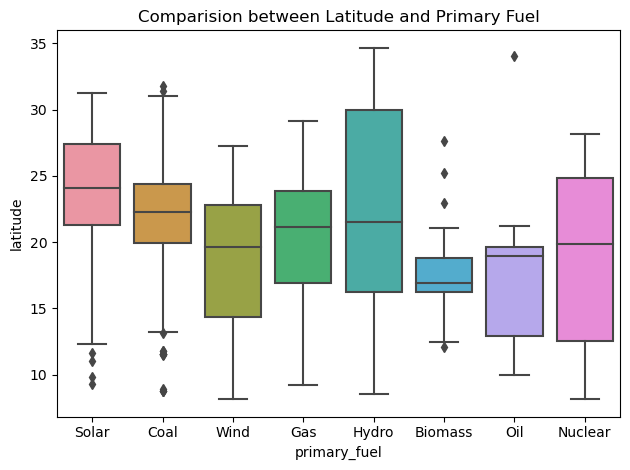

In [32]:
plt.title('Comparision between Latitude and Primary Fuel')
sns.boxplot(x='primary_fuel', y = 'latitude', data = gp_df)
plt.show()

### Location vs Capacity

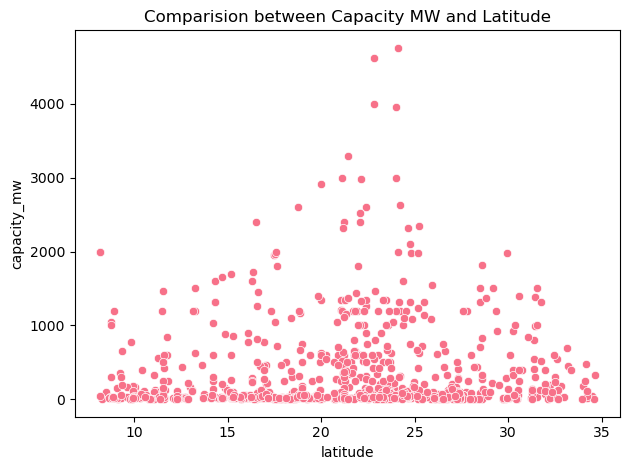

In [33]:
plt.title('Comparision between Capacity MW and Latitude')
sns.scatterplot(x='latitude', y = 'capacity_mw', data = gp_df)
plt.show()

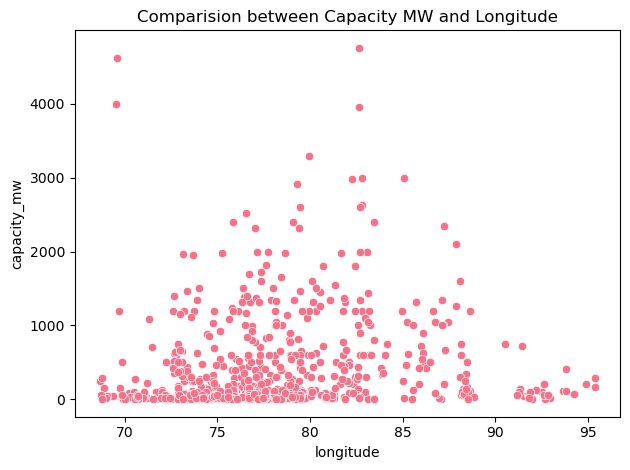

In [34]:
plt.title('Comparision between Capacity MW and Longitude')
sns.scatterplot(x='longitude', y = 'capacity_mw', data = gp_df)
plt.show()

### Commission Age vs Primary Fuel

In [35]:
gp_df['Power_plant_age'] = 2018 - gp_df['commissioning_year']
gp_df.drop(columns=['commissioning_year'],inplace=True)

In [36]:
print('The oldest powerplant Age :',gp_df.Power_plant_age.max())
print('The youngest powerplant Age :',gp_df.Power_plant_age.min())

The oldest powerplant Age : 91.0
The youngest powerplant Age : 0.0


In [37]:
gp_df.loc[gp_df.Power_plant_age==91]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source,Power_plant_age
728,SIVASAMUNDRUM,42.0,12.3082,77.165,Hydro,NaN,Central Electricity Authority,WRI,220.82035,215.3777,144.4143,175.92595,282.76905,Central Electricity Authority,91.0


Oldest Powerplant is SIVASAMUNDRUM which is hydro power based plant with generation capacity of 42 MW.

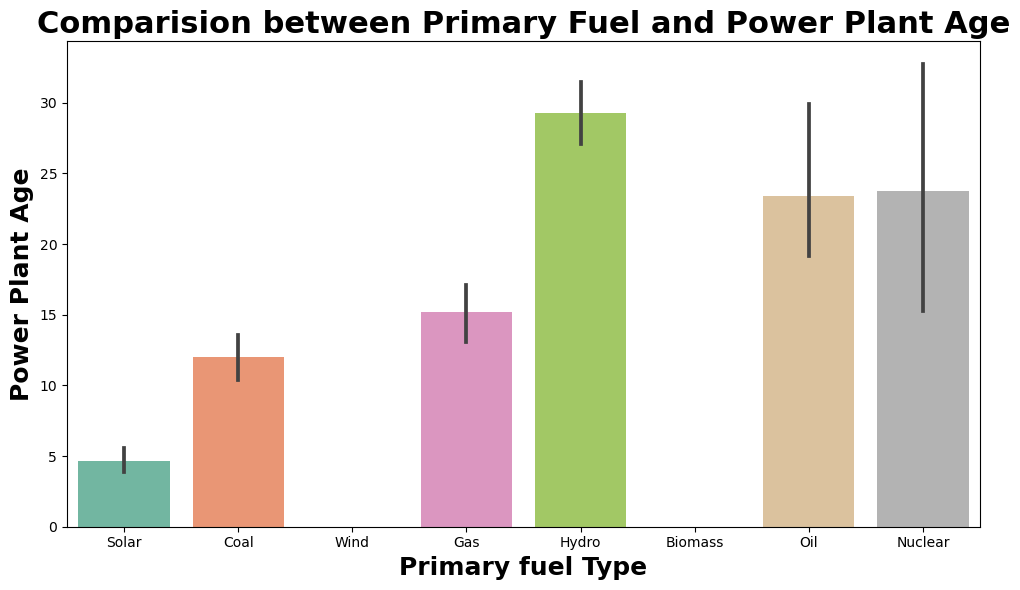

In [44]:
plt.figure(figsize = (10,6))
plt.title("Comparision between Primary Fuel and Power Plant Age", fontsize=22, fontweight='bold')
a= sns.barplot(x = "primary_fuel", y = "Power_plant_age", data = gp_df,palette="Set2")
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('Power Plant Age',fontsize=18,fontweight ='bold')
plt.show()

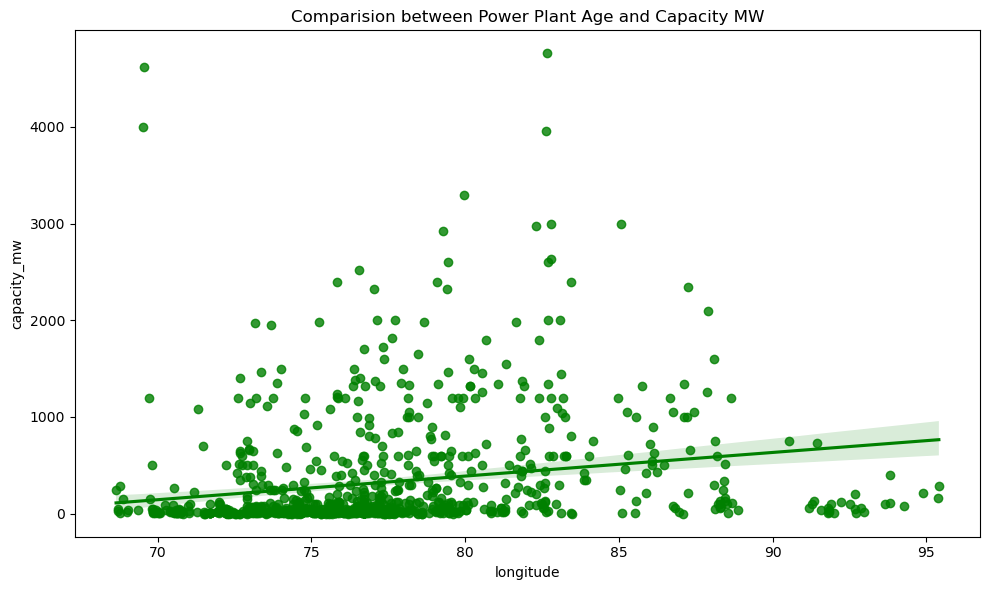

In [45]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Power Plant Age and Capacity MW')
sns.regplot(x='longitude', y = 'capacity_mw', data = gp_df,color='g')
plt.show()


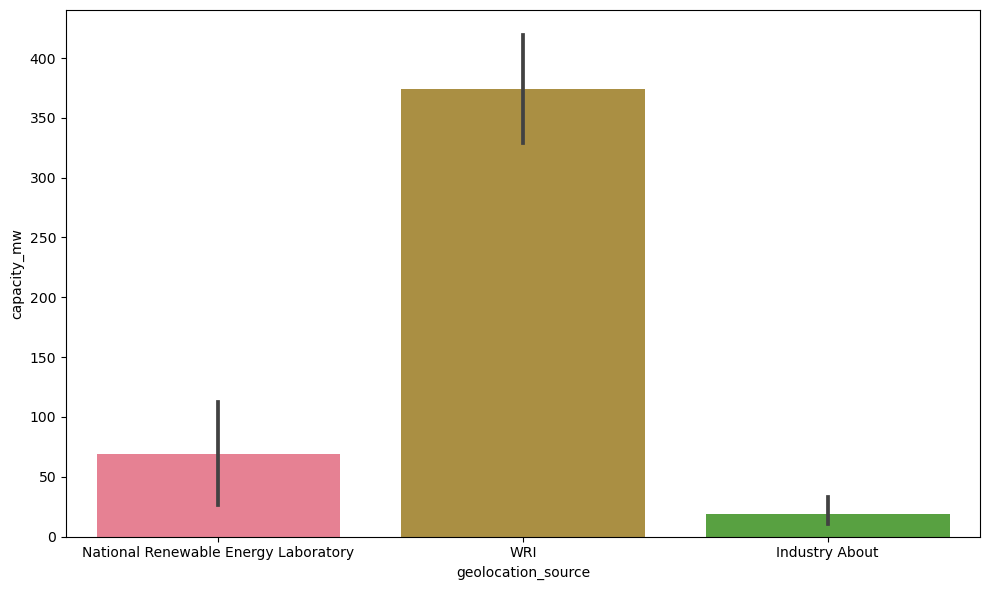

In [46]:
plt.figure(figsize = (10,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = gp_df)
plt.show()

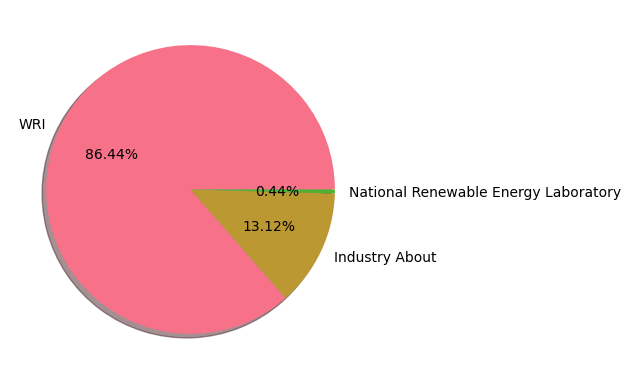

In [47]:
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(6,5))
ax.pie(gp_df['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

The capacity of geological source WRI is maximum which has capacity more than 350 megawatts. The geological source Industry About has less capacity.

### Distribution of Features

In [48]:
Numerical=['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015',
           'generation_gwh_2016', 'generation_gwh_2017','generation_gwh_2018', 'Power_plant_age']

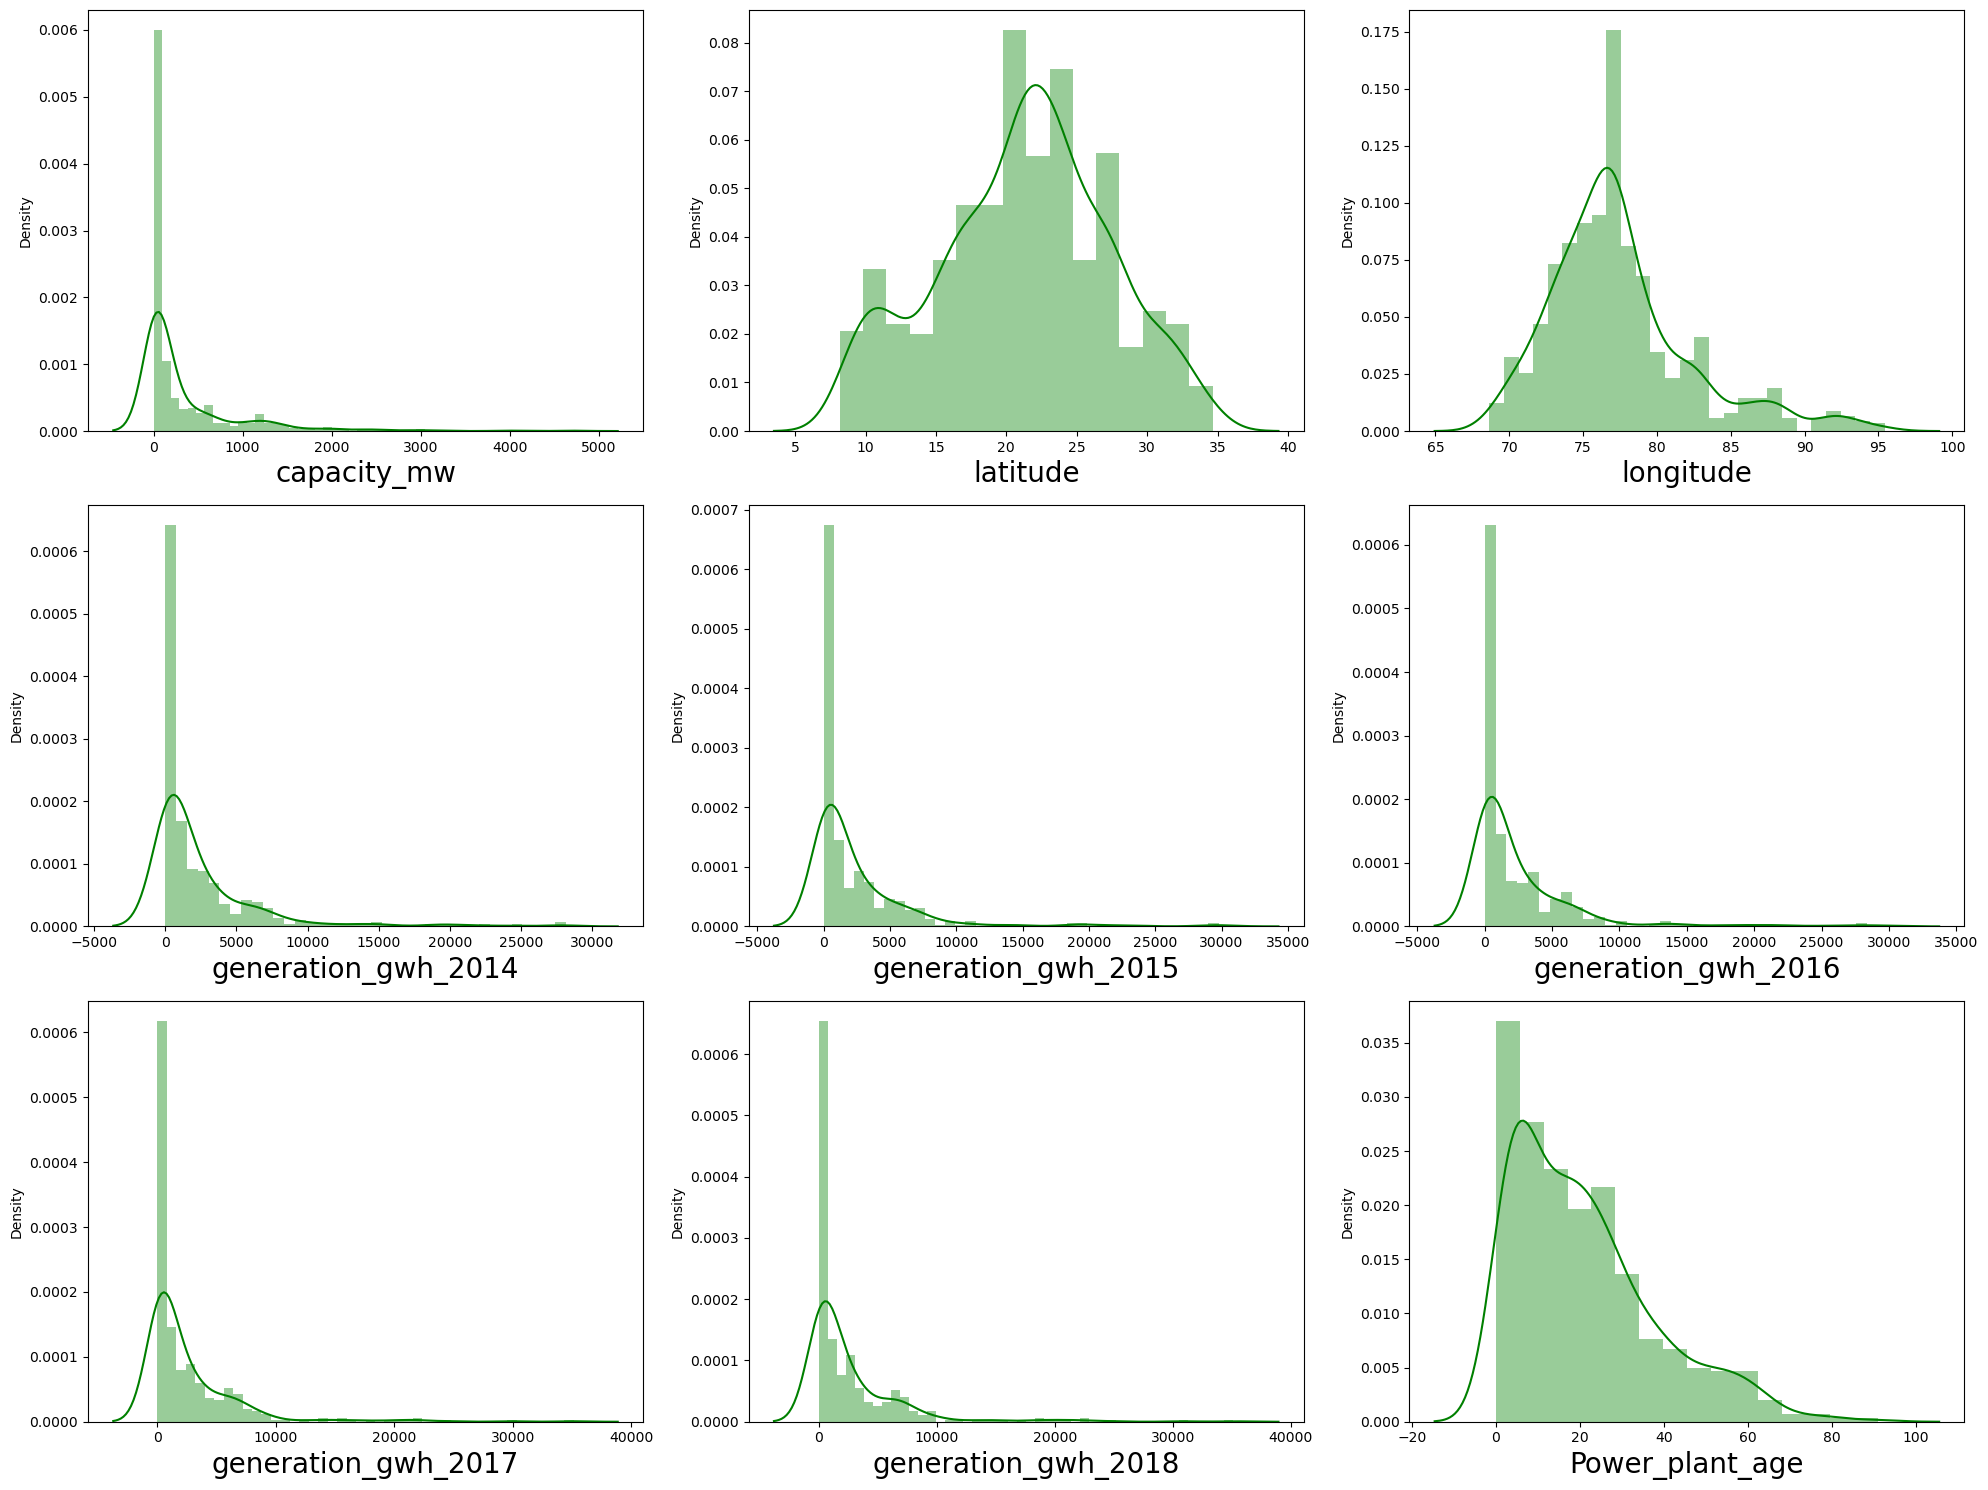

In [49]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(gp_df[col],color='g')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

- From the above distributionplot we can observe that the data is not normally distributed in all the columns except latitude and longitude.
- In most of the columns the mean is greater than the median which means they are skewed to right.
- We will remove the skewness in all these columns except the label later.

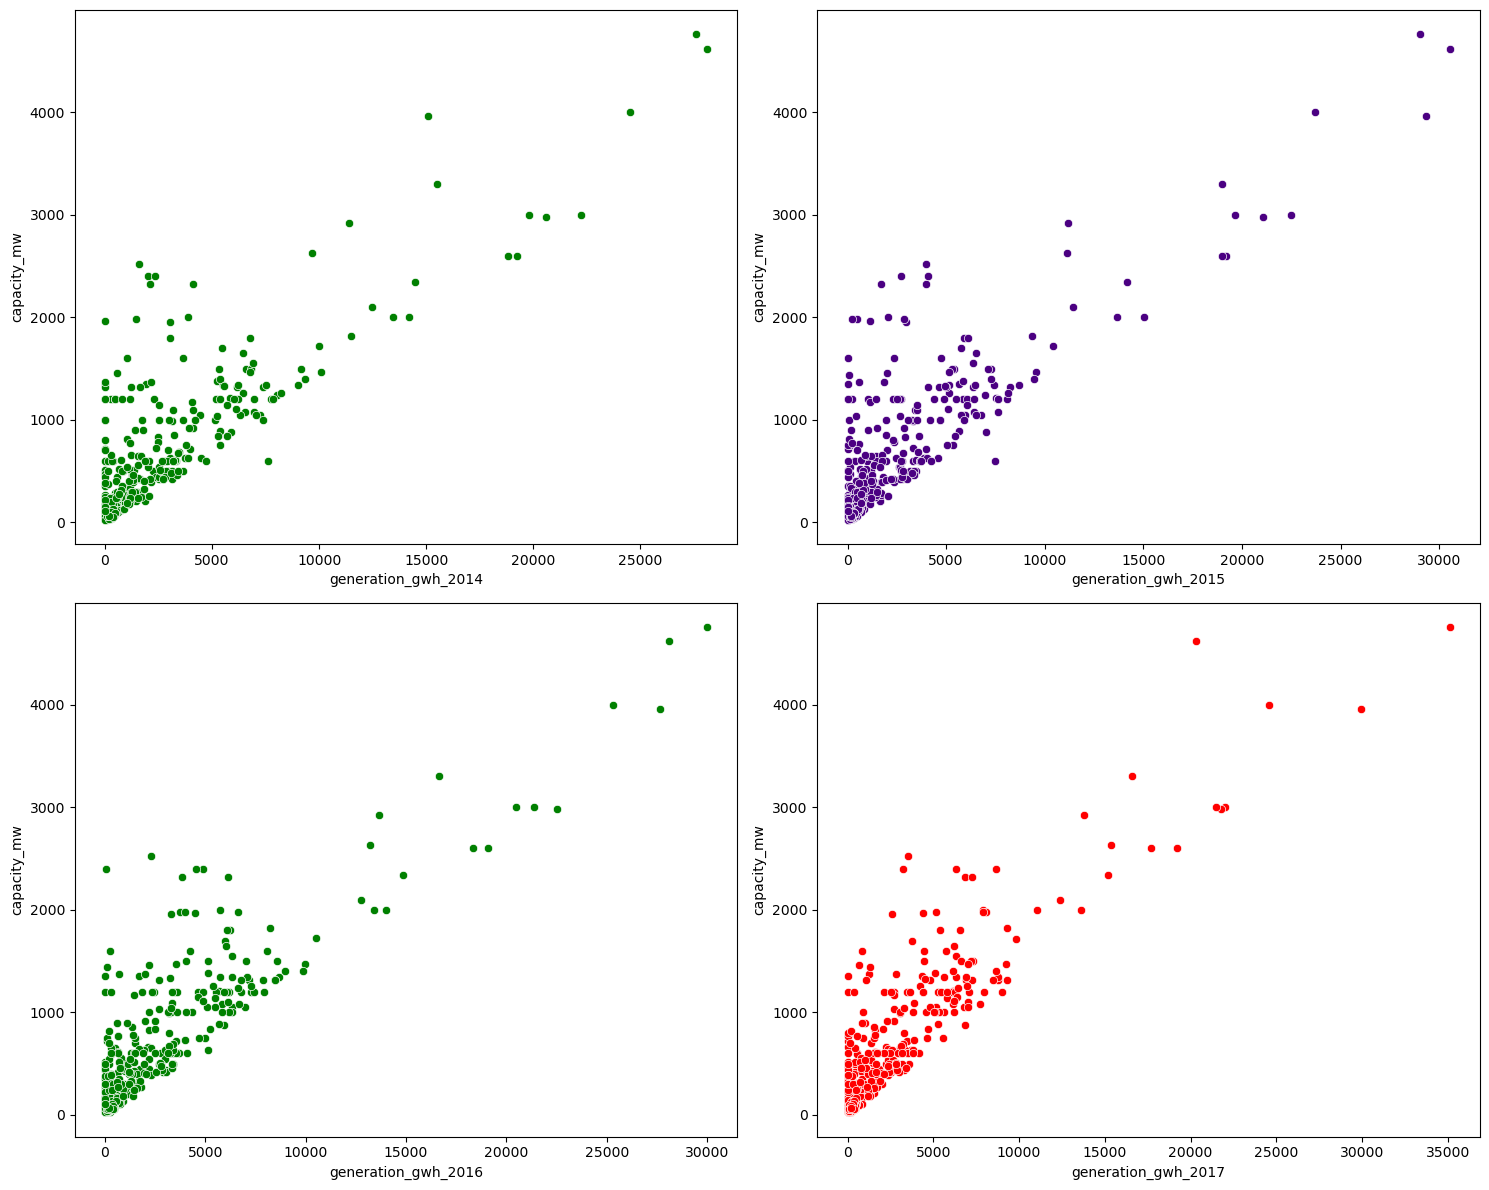

In [50]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

sns.scatterplot(x='generation_gwh_2014',y='capacity_mw',ax=axes[0,0],data=gp_df,color="g")

sns.scatterplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,1],data=gp_df,color="indigo")

sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[1,0],data=gp_df,color="g")

sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,1],data=gp_df,color="r")

plt.show()

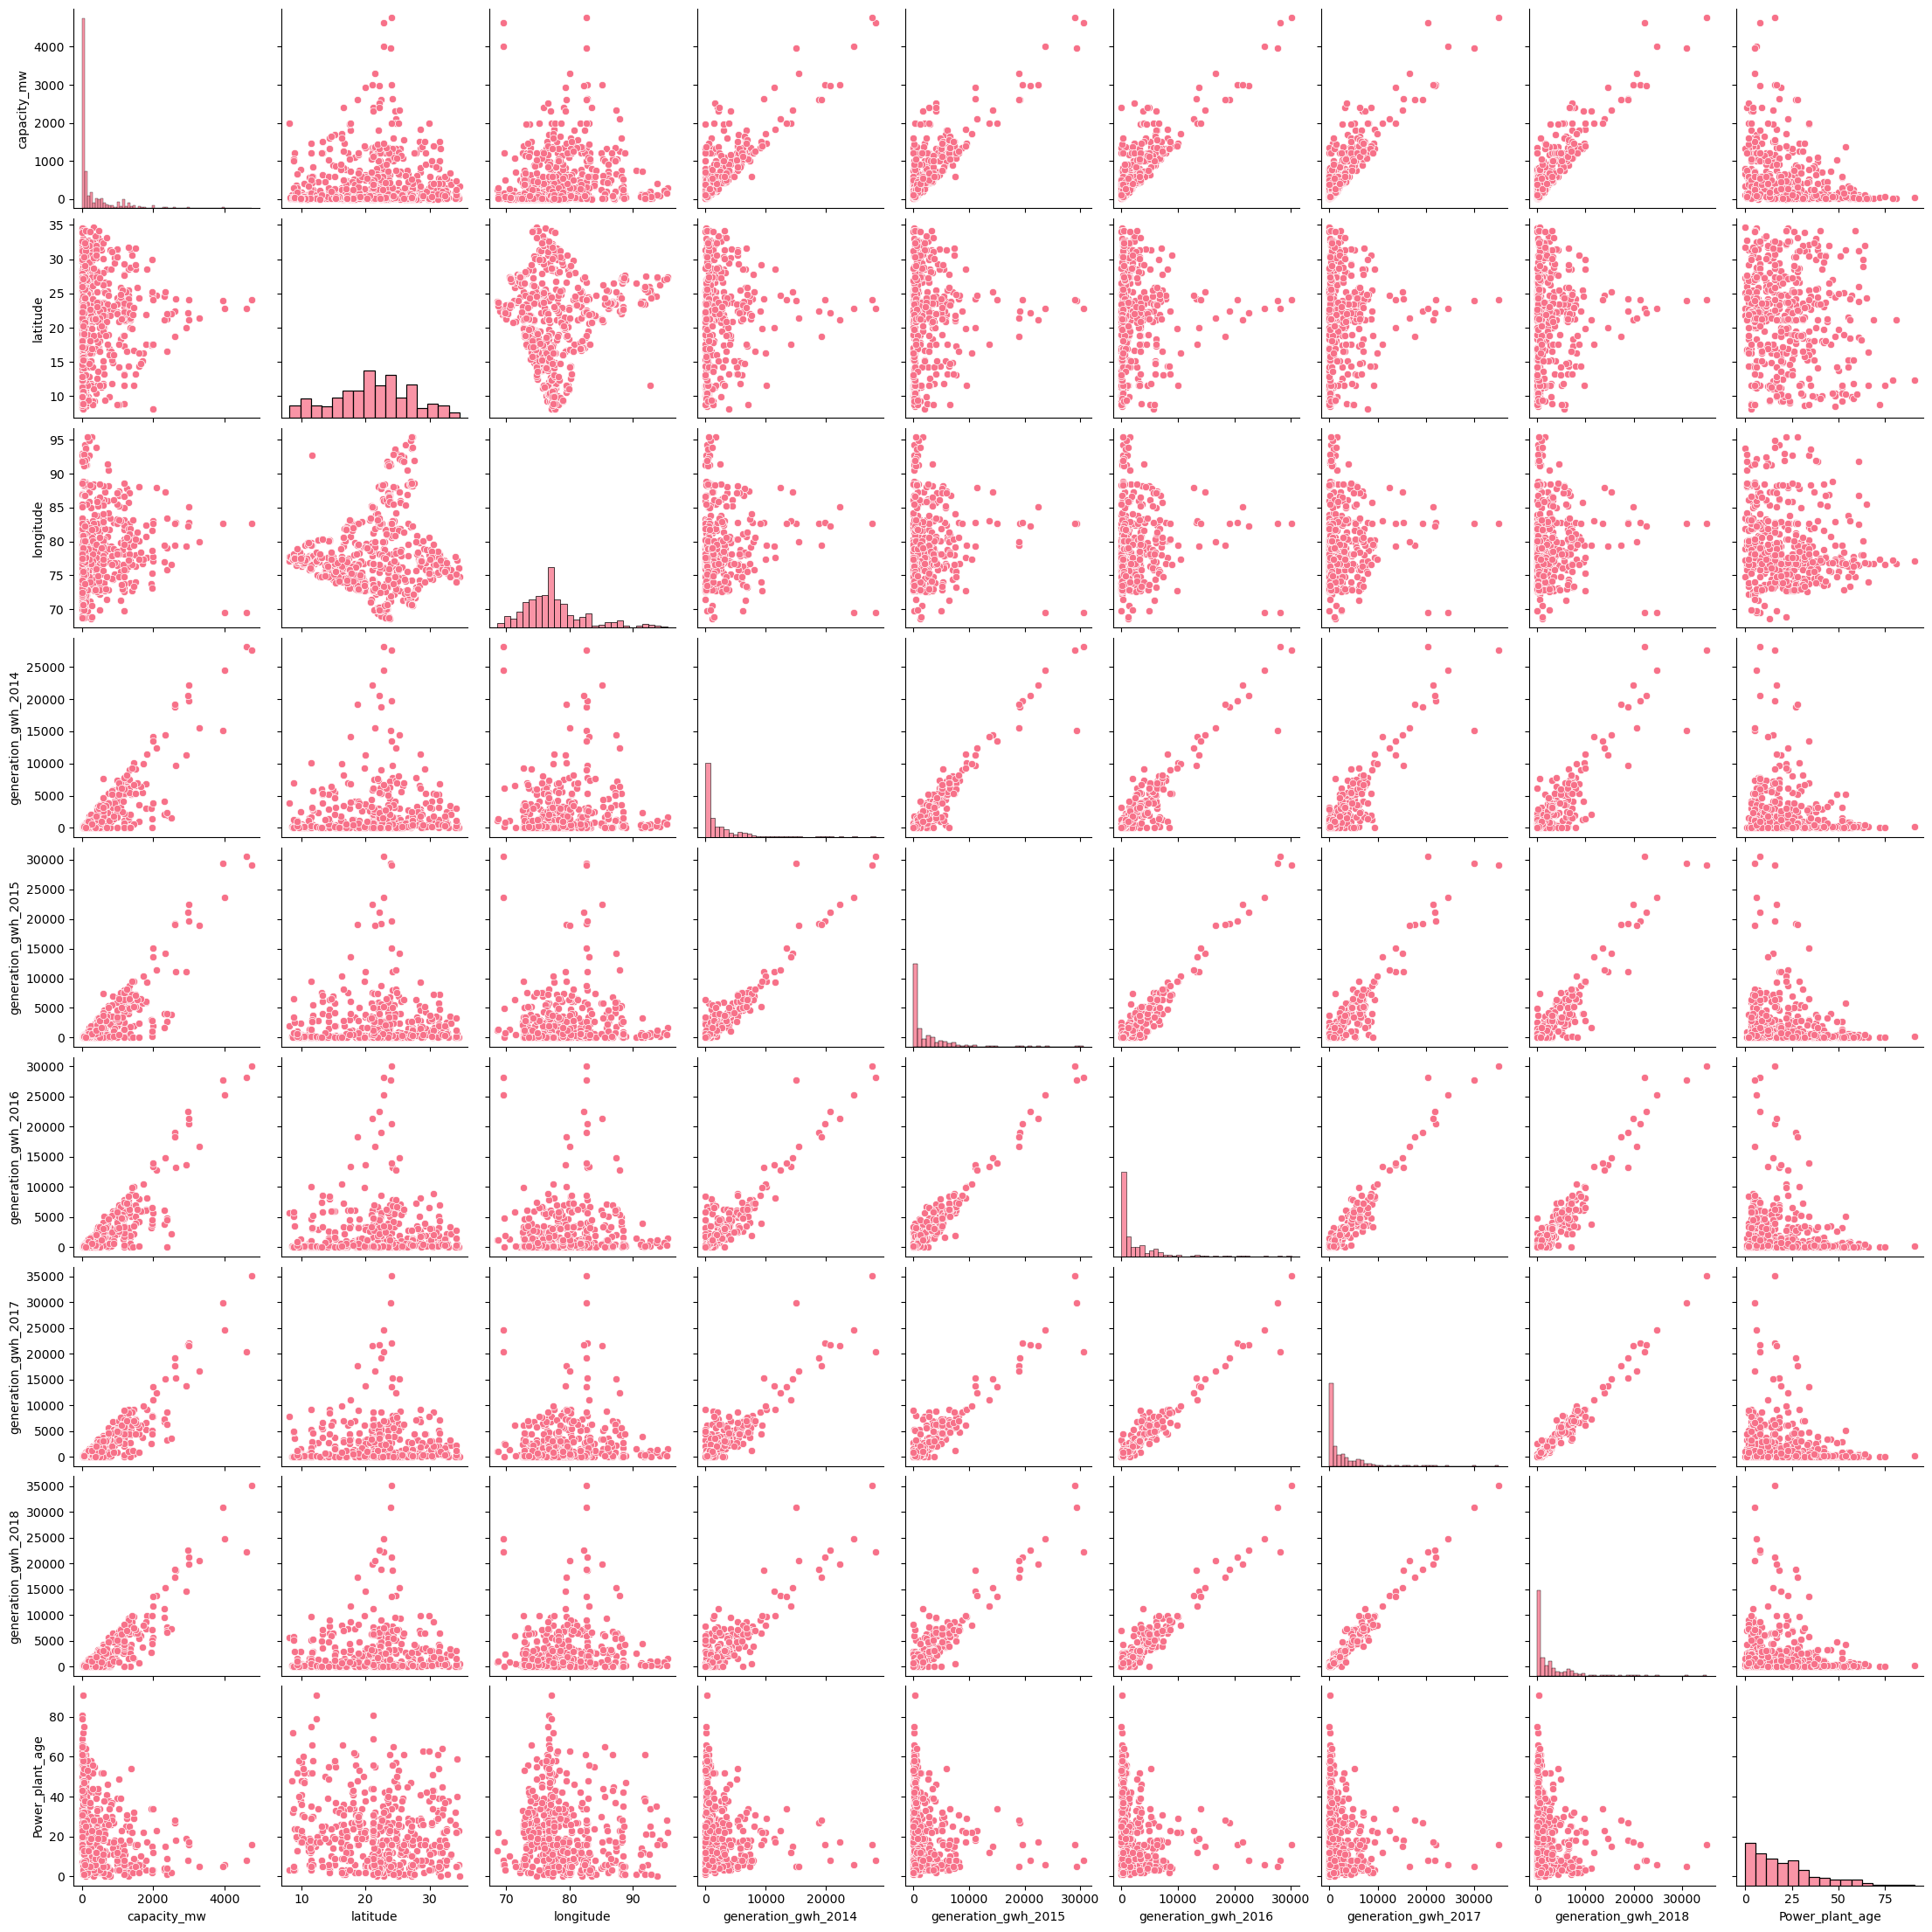

In [51]:
#Checking the pairwise relation between the features and label capacity in megawatt.
sns.pairplot(gp_df)

### Encoding Categorical Data

In [52]:
gp_df.drop(columns=['name'],axis=1,inplace=True)

In [53]:
gp_df.drop(columns=['generation_data_source'],axis=1,inplace=True)

In [54]:
Category=['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']

In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    gp_df[i] = le.fit_transform(gp_df[i])
gp_df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,6,3,109,1,NaN,NaN,NaN,NaN,NaN,7.0
1,98.0,24.7663,74.6090,1,3,174,2,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,7,3,21,2,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,2,3,22,2,617.789264,843.747,886.004428,663.774500,626.239128,14.0
4,1800.0,21.9603,82.4091,1,2,22,2,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,3.0


### Outliers Detection and Removal

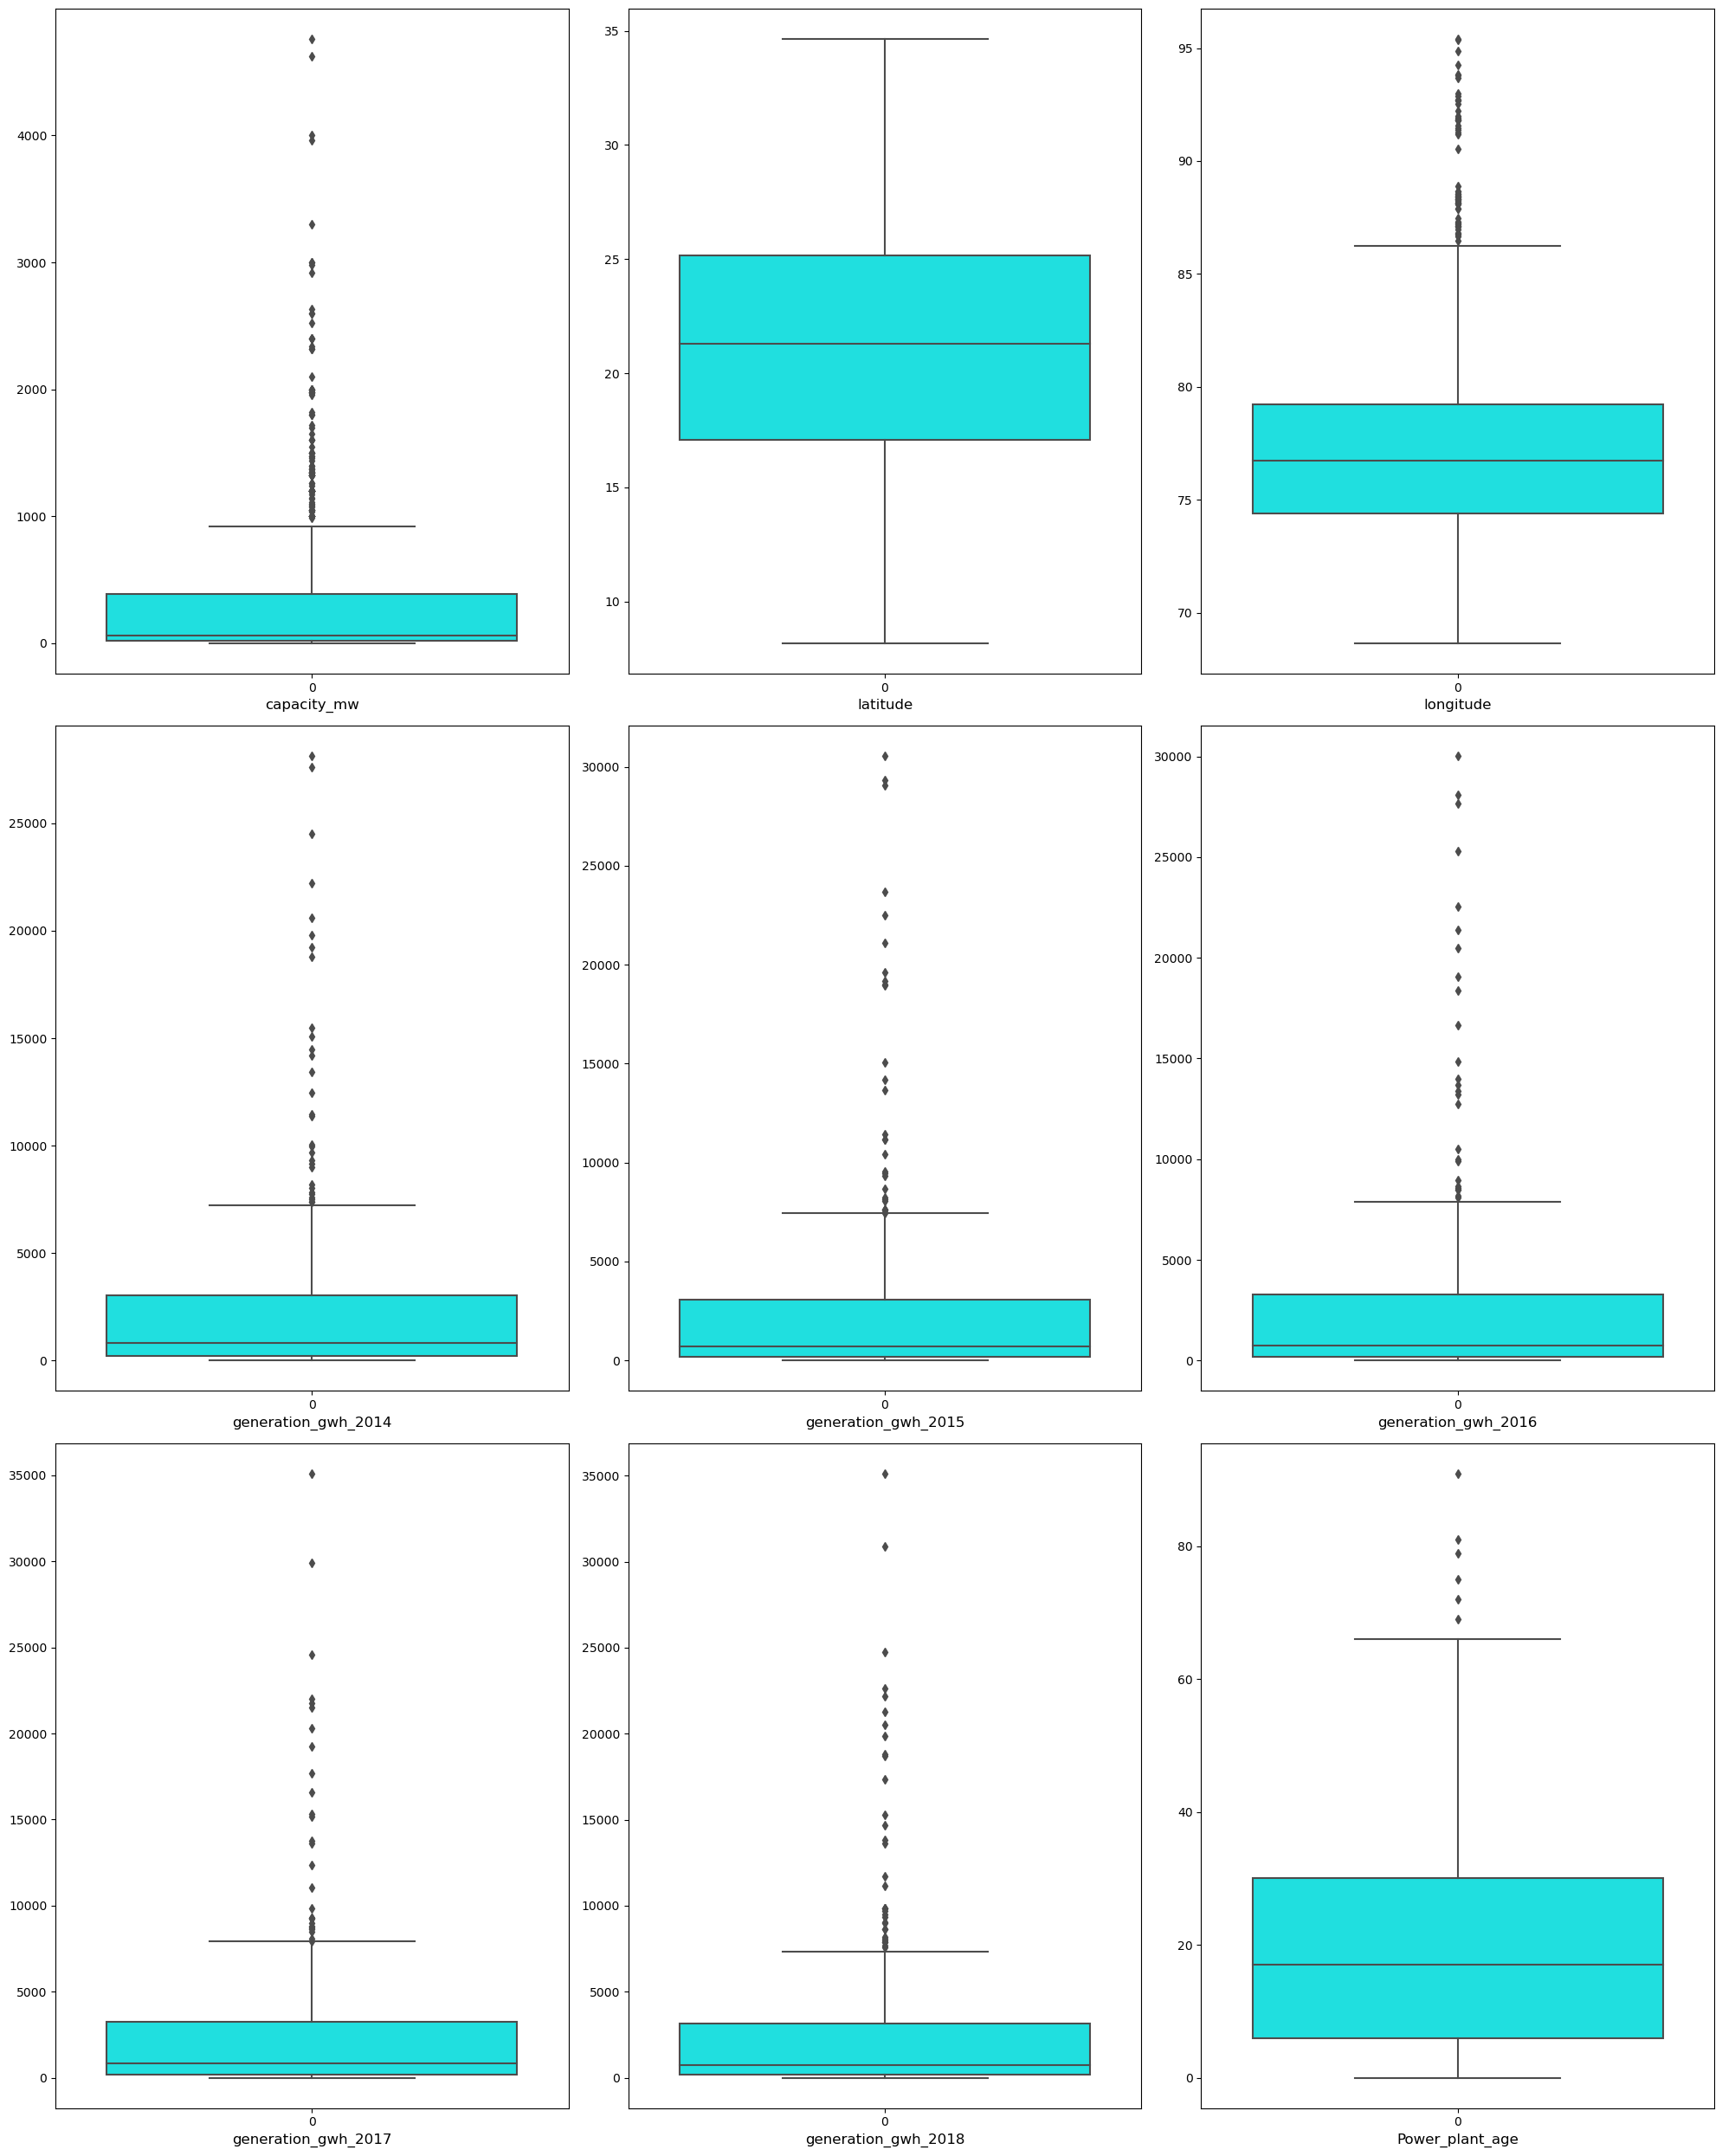

In [56]:
plt.figure(figsize=(20,25))
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(gp_df[col],color='cyan')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

- There outliers exist in data.
- There are no outliers in lower capping level.
- So we will use Quantile-based Flooring and Capping technique.

In [57]:
gp_df.drop(columns=['source','geolocation_source'],axis=1,inplace=True)

In [58]:
gp_df2=gp_df.copy

In [59]:
gp_df3=gp_df.copy()
Q1= gp_df3.quantile(0)
Q3= gp_df3.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

capacity_mw             720.00000
latitude                 19.19886
longitude                13.30444
primary_fuel              6.00000
other_fuel1               3.00000
generation_gwh_2014    5295.18000
generation_gwh_2015    5094.78190
generation_gwh_2016    5246.84405
generation_gwh_2017    5631.03285
generation_gwh_2018    6014.95255
Power_plant_age          39.00000
dtype: float64


In [60]:
data = gp_df3[~((gp_df3 < (Q1 - 1.5 * IQR)) |(gp_df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(877, 11)


#### Data Loss

In [61]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((908-876)/876)*100,'%')

Percentage Data Loss : 3.65296803652968 %


### Correlation Matrix

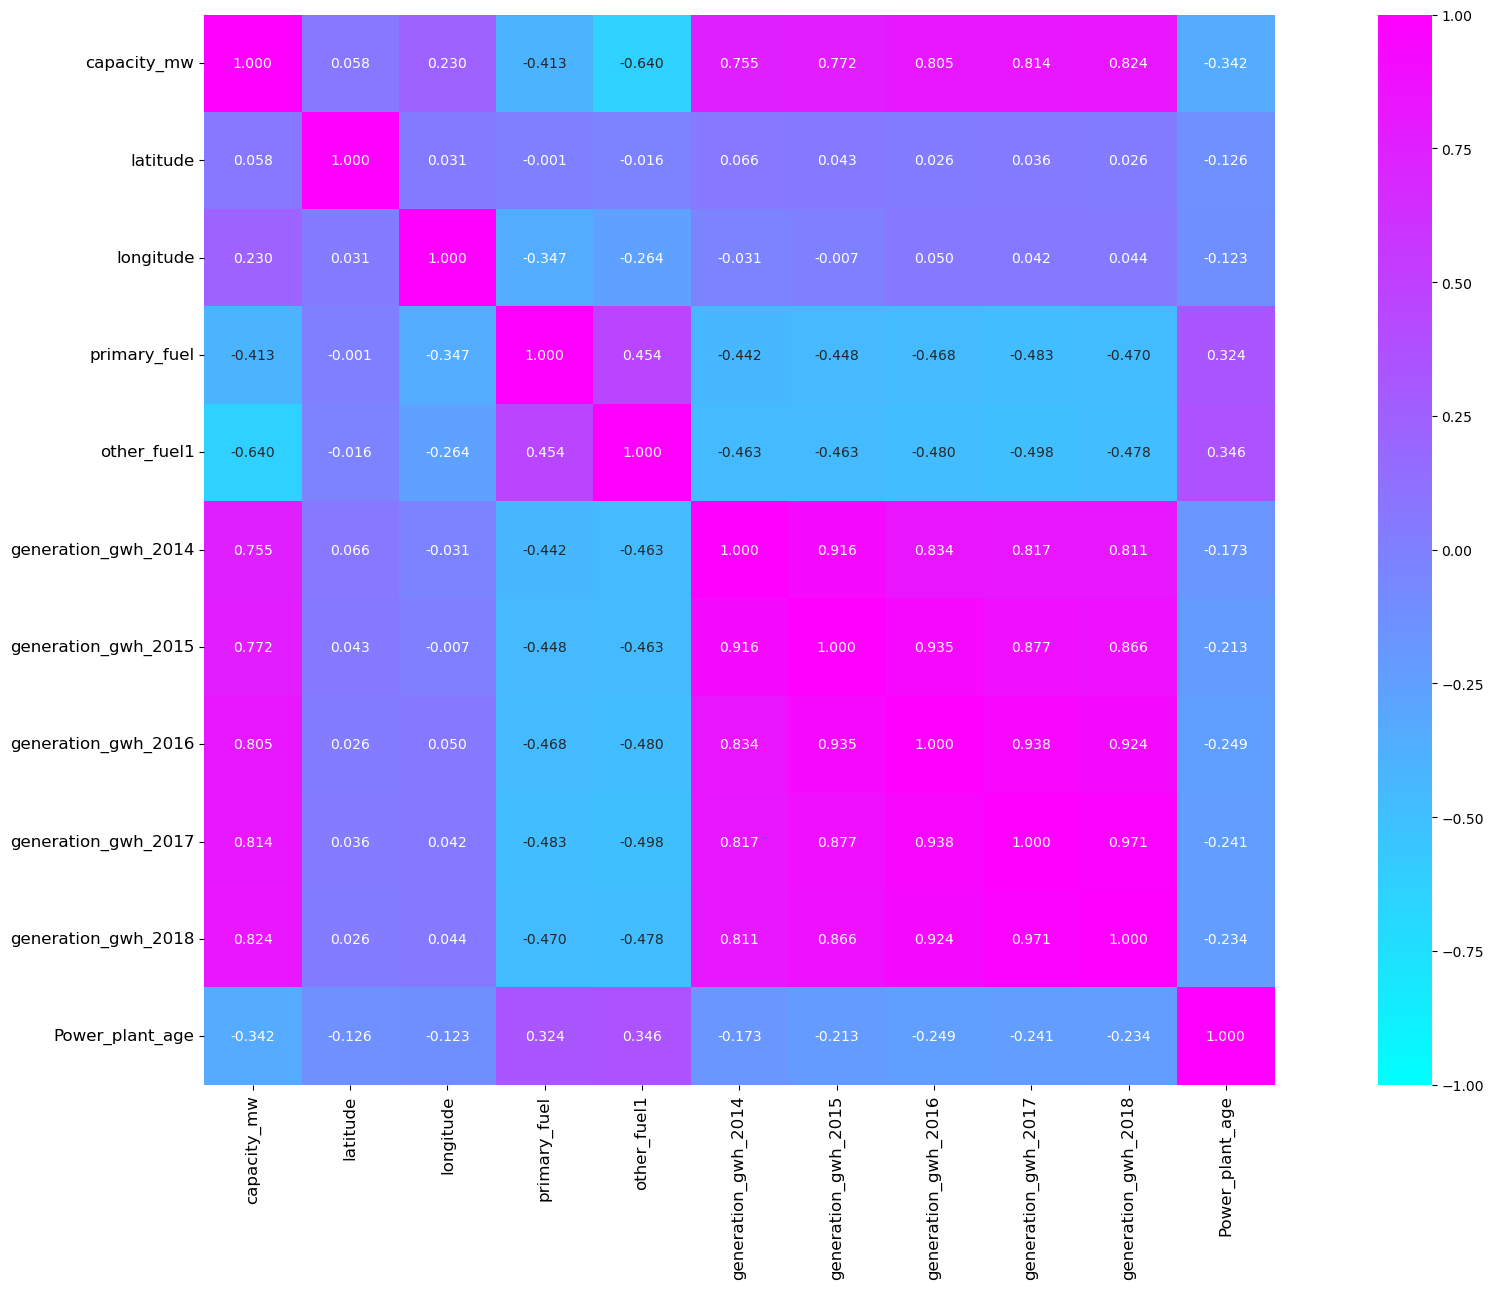

In [62]:
plt.figure(figsize=(21,13))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cool")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


- The label capacity_mw is highly positively correlated with the features generation_gwh_2017,generation_gwh_2016,generation_gwh_2015,generation_gwh_2014,generation_gwh_2018.
- capaity is negatively correlated with the features primary_fuel, source and Powe_plant_age.

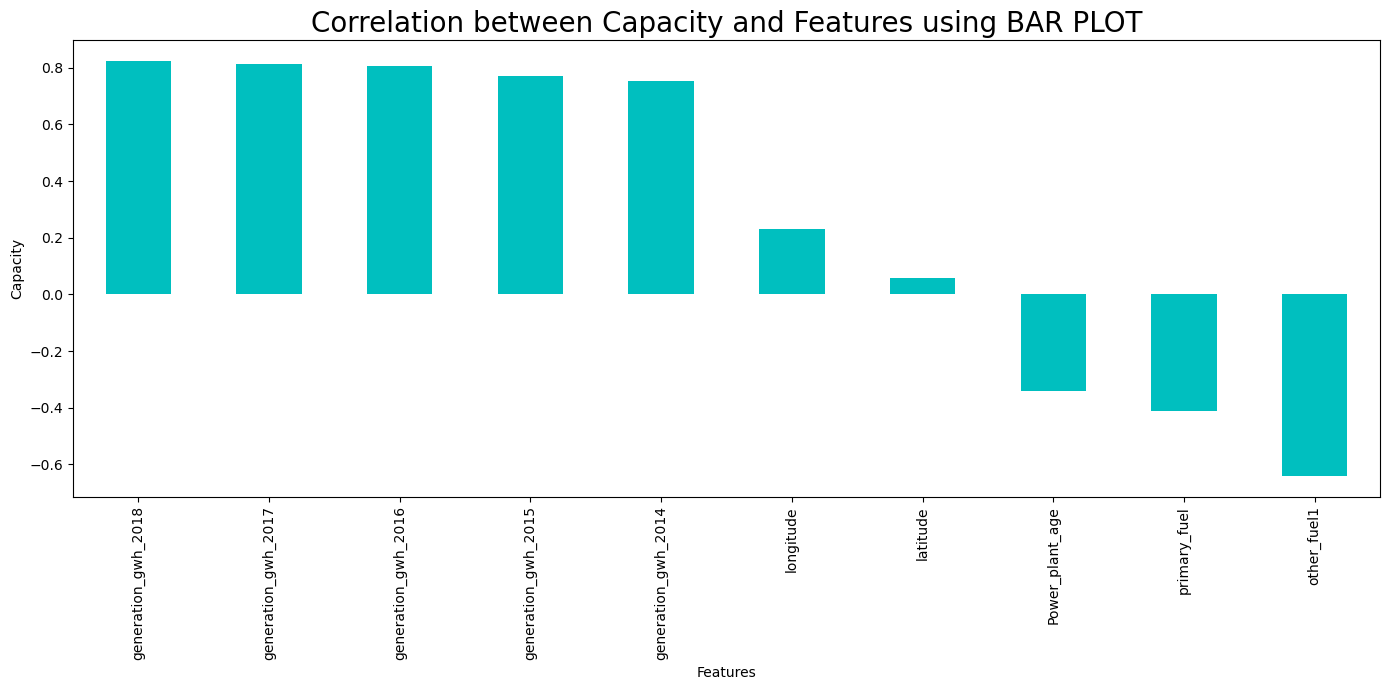

In [63]:
plt.figure(figsize=(14,7))
data.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Capacity',fontsize=10)
plt.title('Correlation between Capacity and Features using BAR PLOT',fontsize=20)
plt.show()

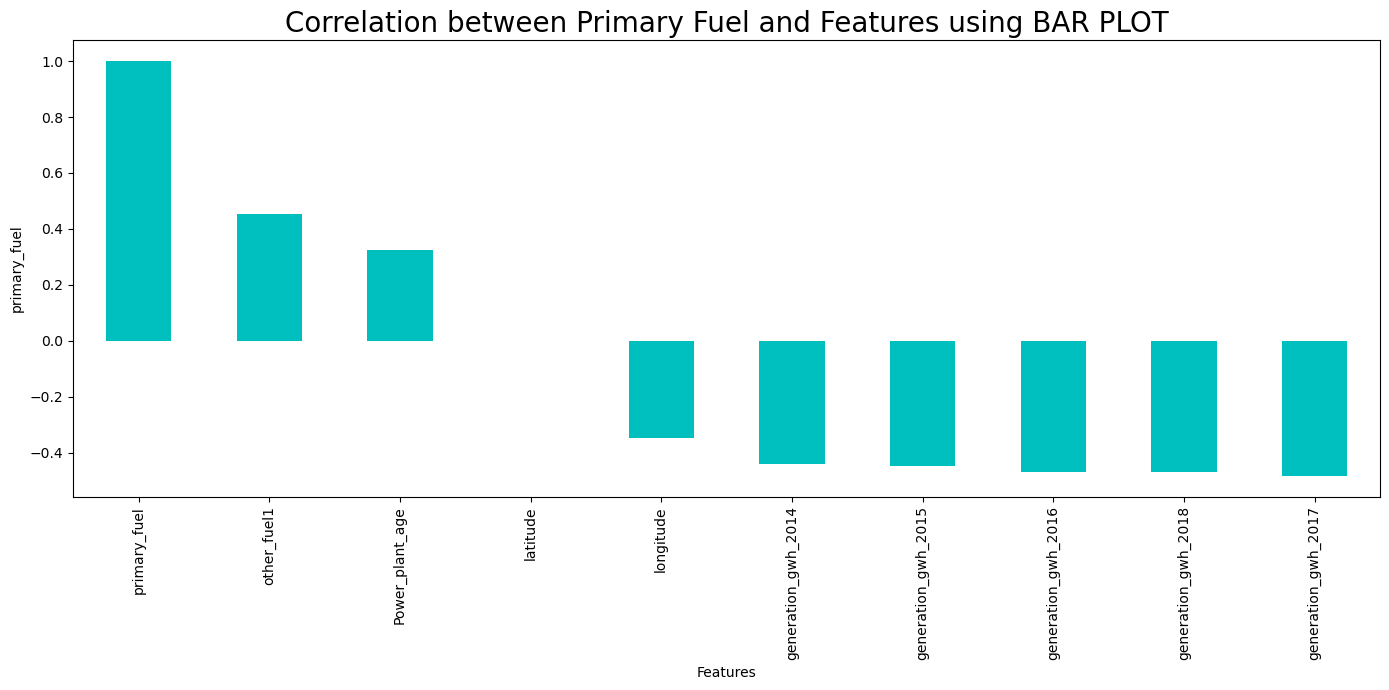

In [64]:
plt.figure(figsize=(14,7))
data.corr()['primary_fuel'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('primary_fuel',fontsize=10)
plt.title('Correlation between Primary Fuel and Features using BAR PLOT',fontsize=20)
plt.show()

### Skewness

In [65]:
data.skew()

capacity_mw            1.945405
latitude              -0.129362
longitude              1.221398
primary_fuel           0.425807
other_fuel1           -1.831505
generation_gwh_2014    1.610443
generation_gwh_2015    1.536958
generation_gwh_2016    1.594947
generation_gwh_2017    1.489783
generation_gwh_2018    1.532123
Power_plant_age        1.030123
dtype: float64

In [66]:
skew = ['longitude','other_fuel1','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [67]:
data[skew] = scaler.fit_transform(data[skew].values)
data[skew].head()

,longitude,other_fuel1,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.933334,0.493934,NaN,NaN,NaN,NaN,NaN,-0.803265
1,-0.516718,0.493934,NaN,NaN,NaN,NaN,NaN,NaN
2,-2.413165,0.493934,NaN,NaN,NaN,NaN,NaN,NaN
3,2.166057,0.493934,-0.115824,0.109529,0.134579,-0.043225,-0.071963,-0.178934
4,1.147361,-2.024155,0.916782,1.451544,1.495059,1.348860,1.596280,-1.370997


In [68]:
data.skew()

capacity_mw            1.945405
latitude              -0.129362
longitude              0.002120
primary_fuel           0.425807
other_fuel1           -1.533254
generation_gwh_2014   -0.134464
generation_gwh_2015   -0.142379
generation_gwh_2016   -0.136447
generation_gwh_2017   -0.155373
generation_gwh_2018   -0.158394
Power_plant_age       -0.075616
dtype: float64

In [69]:
data.drop("other_fuel1",axis=1,inplace=True)
data['Power_plant_age'] = data['Power_plant_age'].fillna(data['Power_plant_age'].mean())

In [70]:
data.drop("generation_gwh_2014",axis=1,inplace=True)
data.drop("generation_gwh_2015",axis=1,inplace=True)
data.drop("generation_gwh_2016",axis=1,inplace=True)
data.drop("generation_gwh_2017",axis=1,inplace=True)
data.drop("generation_gwh_2018",axis=1,inplace=True)

## Machine Learning Model Building Classification

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

### Standard Scaling

In [72]:
X = data.drop(['primary_fuel'], axis =1)
Y = data['primary_fuel']

In [73]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (613, 4)
Training target vector size: (613,)
Test feature matrix size: (264, 4)
Test target vector size: (264,)


### Finding Best Random State

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.6098484848484849 on Random_state 517


### Logistics Regression Model

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.48863636363636365


Confusion matrix of Logistics Regression : 
 [[ 0  0  0  1  0  0  1 10]
 [ 0 43  0 20  0  0  3  3]
 [ 0  8  0  7  0  0  0  3]
 [ 0 21  0 43  0  0  0  8]
 [ 0  2  0  2  0  0  0  0]
 [ 0  0  0  3  0  0  0  2]
 [ 0  0  0  9  0  0 23  8]
 [ 0  1  0  8  0  0 15 20]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.57      0.62      0.60        69
           2       0.00      0.00      0.00        18
           3       0.46      0.60      0.52        72
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         5
           6       0.55      0.57      0.56        40
           7       0.37      0.45      0.41        44

    accuracy                           0.49       264
   macro avg       0.24      0.28      0.26      

### Decision Tree Classifier

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('\033[1m'+'DecisionTreeClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of DecisionTreeClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of DecisionTreeClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of DecisionTreeClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

DecisionTreeClassifier Evaluation


Accuracy Score of DecisionTreeClassifier : 0.6856060606060606


Confusion matrix of DecisionTreeClassifier : 
 [[ 6  2  0  0  0  0  1  3]
 [ 0 45  6 11  0  2  3  2]
 [ 0  2  6  7  0  2  0  1]
 [ 0  5  7 59  0  0  1  0]
 [ 0  2  1  1  0  0  0  0]
 [ 0  1  1  2  0  1  0  0]
 [ 1  3  0  0  0  0 33  3]
 [ 3  1  0  0  0  0  9 31]]


classification Report of DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.60      0.50      0.55        12
           1       0.74      0.65      0.69        69
           2       0.29      0.33      0.31        18
           3       0.74      0.82      0.78        72
           4       0.00      0.00      0.00         4
           5       0.20      0.20      0.20         5
           6       0.70      0.82      0.76        40
           7       0.78      0.70      0.74        44

    accuracy                           0.69       264
   macro avg       0.50      0.50      0.5

### Random Forest Classifier

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('\033[1m'+'RandomForestClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of RandomForestClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of RandomForestClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of RandomForestClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

RandomForestClassifier Evaluation


Accuracy Score of RandomForestClassifier : 0.7613636363636364


Confusion matrix of RandomForestClassifier : 
 [[ 8  3  0  0  0  0  1  0]
 [ 2 51  5  7  1  1  0  2]
 [ 0  4  7  6  0  0  0  1]
 [ 0  2  4 66  0  0  0  0]
 [ 0  2  1  1  0  0  0  0]
 [ 0  1  0  2  0  2  0  0]
 [ 0  3  0  0  0  0 34  3]
 [ 2  1  0  0  0  0  8 33]]


classification Report of RandomForestClassifier 
               precision    recall  f1-score   support

           0       0.67      0.67      0.67        12
           1       0.76      0.74      0.75        69
           2       0.41      0.39      0.40        18
           3       0.80      0.92      0.86        72
           4       0.00      0.00      0.00         4
           5       0.67      0.40      0.50         5
           6       0.79      0.85      0.82        40
           7       0.85      0.75      0.80        44

    accuracy                           0.76       264
   macro avg       0.62      0.59      0.6

### Extra TreesClassifier()

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
etc=ExtraTreesClassifier()
etc.fit(X_train,Y_train)
y_pred=etc.predict(X_test)
print('\033[1m'+'ExtraTreesClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of ExtraTreesClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of ExtraTreesClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of ExtraTreesClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

ExtraTreesClassifier Evaluation


Accuracy Score of ExtraTreesClassifier : 0.7575757575757576


Confusion matrix of ExtraTreesClassifier : 
 [[ 8  2  0  0  0  0  1  1]
 [ 0 54  6  7  0  1  0  1]
 [ 0  4 11  2  0  1  0  0]
 [ 0  7  3 61  0  0  0  1]
 [ 0  3  0  1  0  0  0  0]
 [ 0  1  0  2  0  2  0  0]
 [ 4  3  0  0  0  0 32  1]
 [ 1  3  0  0  0  0  8 32]]


classification Report of ExtraTreesClassifier 
               precision    recall  f1-score   support

           0       0.62      0.67      0.64        12
           1       0.70      0.78      0.74        69
           2       0.55      0.61      0.58        18
           3       0.84      0.85      0.84        72
           4       0.00      0.00      0.00         4
           5       0.50      0.40      0.44         5
           6       0.78      0.80      0.79        40
           7       0.89      0.73      0.80        44

    accuracy                           0.76       264
   macro avg       0.61      0.60      0.60       

### Crossvalidation

In [80]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
       DecisionTreeClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.55681818 0.48295455 0.51428571 0.53142857 0.51428571]
Mean Score : 0.5199545454545454
Std deviation : 0.024182027423871873




Cross Validation Score DecisionTreeClassifier() :

Score : [0.72159091 0.68181818 0.72       0.74285714 0.64      ]
Mean Score : 0.7012532467532467
Std deviation : 0.03640227307332203




Cross Validation Score RandomForestClassifier() :

Score : [0.73863636 0.77840909 0.78285714 0.76       0.76      ]
Mean Score : 0.7639805194805195
Std deviation : 0.01573865235459961




Cross Validation Score ExtraTreesClassifier() :

Score : [0.76704545 0.77840909 0.78857143 0.76571429 0.77714286]
Mean Score : 0.7753766233766234
Std deviation : 0.008356883011934301




We can see that RandomForestClassifier() gives us good Accuracy and maximum f1 score along with best Cross-validation score. we will apply Hyperparameter tuning on Random Forest model and Used it as final model.

## Hyper Parameter Tuning : GridSearchCV

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [83]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=5)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.675 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.626 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.553 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.639 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.672 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=0.683 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=0.650 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, ma

[CV 1/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=70;, score=0.691 total time=   0.1s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=70;, score=0.642 total time=   0.1s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=70;, score=0.650 total time=   0.1s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=70;, score=0.672 total time=   0.1s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=70;, score=0.689 total time=   0.1s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=5;, score=0.707 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=5;, score=0.675 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=5;, score=0.699 total time=

[CV 1/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=60;, score=0.724 total time=   0.1s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=60;, score=0.715 total time=   0.1s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=60;, score=0.715 total time=   0.1s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=60;, score=0.754 total time=   0.1s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=60;, score=0.705 total time=   0.1s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=70;, score=0.748 total time=   0.2s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=70;, score=0.707 total time=   0.2s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=70;, score=0.675 tot

[CV 1/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=50;, score=0.740 total time=   0.1s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=50;, score=0.724 total time=   0.1s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=50;, score=0.707 total time=   0.1s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=50;, score=0.738 total time=   0.1s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=50;, score=0.730 total time=   0.1s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=60;, score=0.732 total time=   0.1s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=60;, score=0.707 total time=   0.1s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=60;, score=0.675 tot

[CV 1/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=25;, score=0.748 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=25;, score=0.748 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=25;, score=0.691 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=25;, score=0.738 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=25;, score=0.705 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=50;, score=0.748 total time=   0.1s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=50;, score=0.707 total time=   0.1s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=50;, score=0.699 tot

[CV 1/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=15;, score=0.772 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=15;, score=0.715 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=15;, score=0.699 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=15;, score=0.746 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=15;, score=0.730 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=25;, score=0.764 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=25;, score=0.740 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=25;, score=0.691 tot

[CV 2/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=10;, score=0.707 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=10;, score=0.724 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=10;, score=0.730 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=10;, score=0.746 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=15;, score=0.732 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=15;, score=0.699 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=15;, score=0.691 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=15;, score=0.746 tot

[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=10;, score=0.626 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=10;, score=0.650 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=10;, score=0.713 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=10;, score=0.672 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15;, score=0.707 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15;, score=0.650 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15;, score=0.691 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15;,

[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=10;, score=0.699 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=10;, score=0.667 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=10;, score=0.697 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=10;, score=0.713 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=15;, score=0.724 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=15;, score=0.756 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=15;, score=0.691 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimat

[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=10;, score=0.683 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=10;, score=0.699 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=10;, score=0.730 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=10;, score=0.762 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=15;, score=0.756 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=15;, score=0.715 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=15;, score=0.707 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimat

[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=10;, score=0.707 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=10;, score=0.675 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=10;, score=0.762 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=10;, score=0.721 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=15;, score=0.715 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=15;, score=0.748 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=15;, score=0.699 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimat

[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10;, score=0.724 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10;, score=0.699 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10;, score=0.713 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10;, score=0.730 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=15;, score=0.740 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=15;, score=0.715 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=15;, score=0.699 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimat

[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10;, score=0.732 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10;, score=0.691 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10;, score=0.762 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10;, score=0.705 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=15;, score=0.724 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=15;, score=0.699 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=15;, score=0.699 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimat

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=5)

In [84]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 60,
 'max_features': 'log2',
 'n_estimators': 50}

## Final Classification Model

In [85]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='gini',n_estimators=60, max_depth=50 ,max_features='auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.75


In [86]:
y_prob = Final_mod.predict_proba(X_test)

In [89]:
import scikitplot as sktplt

### Saving Model

In [127]:
import joblib
joblib.dump(Final_mod,'powerplant_classification_Final.pkl')

['powerplant_classification_Final.pkl']

## Machine Learning Model Building Regression

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

In [131]:
gp_df2=gp_df.copy()

In [132]:
gp_df3=gp_df2.copy()
Q1 = gp_df3.quantile(0)
Q3= gp_df3.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

capacity_mw             720.00000
latitude                 19.19886
longitude                13.30444
primary_fuel              6.00000
other_fuel1               3.00000
generation_gwh_2014    5295.18000
generation_gwh_2015    5094.78190
generation_gwh_2016    5246.84405
generation_gwh_2017    5631.03285
generation_gwh_2018    6014.95255
Power_plant_age          39.00000
dtype: float64


In [133]:
data = gp_df3[~((gp_df3 < (Q1 - 1.5 * IQR)) |(gp_df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(877, 11)


In [134]:
skew = ['longitude','other_fuel1','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
data[skew] = scaler.fit_transform(data[skew].values)
data[skew].head()

,longitude,other_fuel1,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.933334,0.493934,NaN,NaN,NaN,NaN,NaN,-0.803265
1,-0.516718,0.493934,NaN,NaN,NaN,NaN,NaN,NaN
2,-2.413165,0.493934,NaN,NaN,NaN,NaN,NaN,NaN
3,2.166057,0.493934,-0.115824,0.109529,0.134579,-0.043225,-0.071963,-0.178934
4,1.147361,-2.024155,0.916782,1.451544,1.495059,1.348860,1.596280,-1.370997


In [135]:
data.drop("other_fuel1",axis=1,inplace=True)
data['Power_plant_age'] = data['Power_plant_age'].fillna(data['Power_plant_age'].mean())

In [136]:
data.drop("generation_gwh_2014",axis=1,inplace=True)
data.drop("generation_gwh_2015",axis=1,inplace=True)
data.drop("generation_gwh_2016",axis=1,inplace=True)
data.drop("generation_gwh_2017",axis=1,inplace=True)
data.drop("generation_gwh_2018",axis=1,inplace=True)

### Standard Scaling

In [137]:
X = data.drop(['capacity_mw'], axis =1)
Y = data['capacity_mw']

In [138]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=557, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (587, 4)
Training target vector size: (587,)
Test feature matrix size: (290, 4)
Test target vector size: (290,)


In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.32142351199370456 on Random_state 66


### Linear Regression

In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=91, test_size=.3)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [ 8.96267957e+01  1.14217617e+00  3.57360468e+02  6.10323774e+02
  8.82090261e+01  3.41867292e+02  2.79943353e-01  6.03620820e+02
  7.06270454e+01  3.43809233e+02  4.12210557e+02  1.86236208e+02
  4.51119528e+02  5.92415895e+02  4.07595486e+02  1.84291953e+01
  4.37119258e+02  4.17669858e+02  1.35277613e+02  3.61669502e+00
  2.12481810e+02  2.22686881e+02  7.00029948e+01  7.01358663e+01
  2.71708626e+02  5.14724101e+01  3.55468501e+01  2.63776527e+02
  3.24221185e+02  4.69618801e+02  5.14574258e+01  6.09169066e+02
  3.62041388e+02  1.10294468e+02  1.47126198e+02  3.09804422e+02
  4.02589629e+02  4.00424214e+02  5.41381589e+02  5.37924562e+02
  1.10900965e+01  1.97597922e+02  1.84920533e+02  4.48842163e+02
  2.48149462e+02  3.45494206e+02  5.48584546e+01  6.31237472e+00
  4.08274205e+02  1.29253938e+00  3.37164392e+02  1.20083264e+02
  1.44989440e+02  3.75070867e+02  6.79394069e+02  2.70559179e+02
  5.55398489e+02 -6.76222451e+01  6.17589171e+01  3.18621136e+02
  7.1274

In [142]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 231.90014213676432
Mean squared error : 121621.09104031285
Root Mean Squared Error: 348.7421555251284


 R2 Score :
0.21182364540032728


### Applying other ML Models

In [143]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor()
rd=Ridge(alpha=0.01)
xgb=XGBRegressor()
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('==============================================================================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 165.51676294541747
Mean squared error : 82857.49827719844
Root Mean Squared Error: 287.8497842229492


 R2 Score :
0.4630345741453321


 Error of  Ridge(alpha=0.01) :
Mean absolute error : 231.89963356419466
Mean squared error : 121620.98598474877
Root Mean Squared Error: 348.7420049044118


 R2 Score :
0.2118243262223034


 Error of  DecisionTreeRegressor() :
Mean absolute error : 194.9542875874126
Mean squared error : 122592.28029996692
Root Mean Squared Error: 350.13180418232065


 R2 Score :
0.20552976656933752


 Error of  AdaBoostRegressor(learning_rate=0.1) :
Mean absolute error : 184.82239593645312
Mean squared error : 85152.28572877741
Root Mean Squared Error: 291.80864574028203


 R2 Score :
0.4481629988889724


 Error of  GradientBoostingRegressor() :
Mean absolute error : 168.79037427389252
Mean squared error : 81602.20306701145
Root Mean Squared Error: 285.6609932542619


 R2 Score :
0.47116962699059606


 Error 

In [144]:
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.5149280714434274


Cross Validation Score : Ridge(alpha=0.01) :

Mean CV Score : 0.22748377028159927


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.21958723644530664


Cross Validation Score : AdaBoostRegressor(learning_rate=0.1) :

Mean CV Score : 0.46062496892056864


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.4882012572946299


Cross Validation Score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max

Among all Model Random Forest Regressor gave us maximum R2 score and minimum RMSE value . So We will perform Hyper Parameter Tuning on Random Forest Regressor.

In [145]:
from sklearn.model_selection import GridSearchCV

In [146]:
parameter = {'n_estimators':[50,60,80],'max_depth': [10,20,40],
            'criterion':['mse','mae'],'min_samples_leaf': [5,10,15],
             'min_samples_split':[5,10,15,20],
             'max_features':["auto","sqrt","log2"]}

In [147]:
GCV = GridSearchCV(RandomForestRegressor(),parameter,verbose = 5)

In [151]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV 1/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=nan total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=10, 

[CV 4/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=nan total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=nan total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=10, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=10, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=10, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=10, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_sp

[CV 4/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=nan total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=nan total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=nan total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=nan total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=nan total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=nan total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_

[CV 2/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=nan total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=nan total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=nan total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=nan total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_

[CV 4/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=80;, score=nan total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=80;, score=nan total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_sp

[CV 4/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=60;, score=nan total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=60;, score=nan total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=60;, score=nan total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=60;, score=nan total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=

[CV 1/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=60;, score=nan total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=60;, score=nan total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=60;, score=nan total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=60;, score=nan total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=60;, score=nan total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=nan total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=1

[CV 4/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=nan total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=nan total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=nan total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=nan total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_es

[CV 5/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=15, n_estimators=60;, score=nan total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=15, n_estimators=80;, score=nan total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=15, n_estimators=80;, score=nan total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=15, n_estimators=80;, score=nan total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=15, n_estimators=80;, score=nan total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=15, n_estimators=80;, score=nan total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_

[CV 4/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=nan total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=nan total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_

[CV 2/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=15, n_estimators=60;, score=nan total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=15, n_estimators=60;, score=nan total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_

[CV 5/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=nan total time=   0.0s
[CV 1/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=nan total time=   0.0s
[CV 2/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=nan total time=   0.0s
[CV 3/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=nan total time=   0.0s
[CV 4/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=nan total time=   0.0s
[CV 5/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=nan total time=   0.0s
[CV 1/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=

[CV 3/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=nan total time=   0.0s
[CV 4/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=nan total time=   0.0s
[CV 5/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=nan total time=   0.0s
[CV 1/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_spl

[CV 2/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=nan total time=   0.0s
[CV 3/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=nan total time=   0.0s
[CV 4/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=nan total time=   0.0s
[CV 5/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=nan total time=   0.0s
[CV 1/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_

[CV 4/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=60;, score=nan total time=   0.0s
[CV 5/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=60;, score=nan total time=   0.0s
[CV 1/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=80;, score=nan total time=   0.0s
[CV 2/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=80;, score=nan total time=   0.0s
[CV 3/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=80;, score=nan total time=   0.0s
[CV 4/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=80;, score=nan total time=   0.0s
[CV 5/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=

[CV 3/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=nan total time=   0.0s
[CV 4/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=nan total time=   0.0s
[CV 5/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=nan total time=   0.0s
[CV 1/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=

[CV 3/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=nan total time=   0.0s
[CV 4/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=nan total time=   0.0s
[CV 5/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=nan total time=   0.0s
[CV 1/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=1

[CV 2/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=60;, score=nan total time=   0.0s
[CV 2/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=60;, score=nan total time=   0.0s
[CV 3/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=1

[CV 5/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=nan total time=   0.0s
[CV 1/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=nan total time=   0.0s
[CV 2/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=nan total time=   0.0s
[CV 3/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=nan total time=   0.0s
[CV 4/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=nan total time=   0.0s
[CV 5/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=nan total time=   0.0s
[CV 1/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=1

[CV 3/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=nan total time=   0.0s
[CV 2/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=nan total time=   0.0s
[CV 3/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=nan total time=   0.0s
[CV 4/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_es

[CV 3/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=nan total time=   0.0s
[CV 2/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=nan total time=   0.0s
[CV 3/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=nan total time=   0.0s
[CV 4/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_

ValueError: 
All the 3240 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1620 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\AMEET\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMEET\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\AMEET\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\AMEET\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'squared_error', 'poisson', 'absolute_error', 'friedman_mse'}. Got 'mse' instead.

--------------------------------------------------------------------------------
1620 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\AMEET\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMEET\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\AMEET\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\AMEET\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'squared_error', 'poisson', 'absolute_error', 'friedman_mse'}. Got 'mae' instead.


In [ ]:
GCV.best_params_

### Final Regression Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
Final_mod =  RandomForestRegressor(n_estimators=80 ,criterion = 'mse', max_depth= 40, max_features = 'sqrt',
             min_samples_leaf = 5, min_samples_split = 10)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')

In [ ]:
plt.figure(figsize=(12,7))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

### Final Regression Saving Model

In [180]:
import joblib
joblib.dump(Final_mod,'Powerplant_regression_Final.pkl')

['Powerplant_regression_Final.pkl']